# map status!!!

## (1) Datos de Glottolog

In [222]:
## usamos pandas para leer los datos

import pandas as pd

In [223]:
## diccionario iso:glottocode
## https://glottolog.org/meta/downloads

langs = pd.read_csv('languages_and_dialects_geo.csv',sep=',')

In [224]:
## filtramos por lenguas de las Américas

macroarea = langs[['glottocode','macroarea']]
macroarea = macroarea.dropna()

In [225]:
## creamos un diccionario iso:macroarea
## filtramos por macroarea 'South America' y 'North America'

macroarea = dict(zip(macroarea['glottocode'], macroarea['macroarea']))
macroarea = {language:macroarea[language] for language in macroarea.keys() if macroarea[language] in ['South America']}

In [226]:
print(len(macroarea))

1111


In [227]:
## familias de las Américas

In [228]:
languoid_status = pd.read_csv('languoid-3.4.csv',sep=',')

In [229]:
country = languoid_status[['id','country_ids']]
country = country.dropna()

In [230]:
country = dict(zip(country['id'],country['country_ids']))

In [231]:
status = languoid_status[['id','status']]
status = status.dropna()

In [232]:
set(status['status'])

{'critically endangered',
 'definitely endangered',
 'extinct',
 'safe',
 'severely endangered',
 'vulnerable'}

In [233]:
status = dict(zip(status['id'],status['status']))

In [234]:
status = {key:status[key] for key in status.keys() if key in macroarea.keys()}

In [235]:
values_status = {'safe':'not endangered', 'vulnerable':'threatened', 'definitely endangered':'shifting', 'severely endangered':'moribund', 'critically endangered':'nearly extinct', 'extinct':'extinct'}
status = {key:values_status[status[key]] for key in status.keys() if key in macroarea.keys()}

In [236]:
len(status)

1064

In [237]:
## miramos languoids

languoid = pd.read_csv('languoid.csv',sep=',')

In [238]:
languoid

id family_id parent_id                 name  bookkeeping  \
0      3adt1234  afro1255  nort3292           3Ad-Tekles        False   
1      aala1237  aust1307  ramo1244               Aalawa        False   
2      aant1238  nucl1709  nort2920           Aantantara        False   
3      aari1238  sout2845  ahkk1235           Aari-Gayil        False   
4      aari1239  sout2845  aari1238                 Aari        False   
...         ...       ...       ...                  ...          ...   
25434  zuti1239  tupi1275  guaj1255  Guajajára of Zutiua        False   
25435  zuwa1238  koia1260  omie1241              Zuwadza        False   
25436  zwal1238  atla1278  shal1242                Zwall        False   
25437  zyph1238  sino1245  nucl1757                Zyphe        False   
25438  zyud1238  ural1272  komi1269              Zyuzdin        False   

          level  latitude  longitude iso639P3code  description  \
0       dialect       NaN        NaN          NaN          NaN   
1       dialect       NaN        NaN          NaN          NaN   
2       dialect       NaN        NaN          NaN          NaN   
3        family       NaN        NaN          aiz          NaN   
4      language   5.95034    36.5721          aiw          NaN   
...         ...       ...        ...          ...          ...   
25434   dialect       NaN        NaN          NaN          NaN   
25435   dialect       NaN        NaN          NaN          NaN   
25436   dialect       NaN        NaN          NaN          NaN   
25437  language  22.52400    93.2640          zyp          NaN   
25438   dialect       NaN        NaN          NaN          NaN   

       markup_description  child_family_count  child_language_count  \
0                     NaN                   0                     0   
1                     NaN                   0                     0   
2                     NaN                   0                     0   
3                     NaN                   0                     2   
4                     NaN                   0                     0   
...                   ...                 ...                   ...   
25434                 NaN                   0                     0   
25435                 NaN                   0                     0   
25436                 NaN                   0                     0   
25437                 NaN                   0                     0   
25438                 NaN                   0                     0   

       child_dialect_count country_ids  
0                        0         NaN  
1                        0         NaN  
2                        0         NaN  
3                        0         NaN  
4                        0          ET  
...                    ...         ...  
25434                    0         NaN  
25435                    0         NaN  
25436                    0         NaN  
25437                    2       IN MM  
25438                    0         NaN  

[25439 rows x 15 columns]

In [239]:
family_id = languoid[['id','family_id']]
family_id = family_id.dropna()

In [240]:
family_id = dict(zip(family_id['id'],family_id['family_id']))

In [241]:
family_id = {key:family_id[key] for key in family_id.keys() if family_id[key]!='book1242'}

In [242]:
## https://www.routledgehandbooks.com/doi/10.4324/9781315750026.ch10

isolates = ['arut1244','sape1238','puin1248','pume1238','taru1236','wara1303','yuwa1244','paez1247','tini1245',
            'cams1241','leco1242','ando1256','cofa1242','cand1248','waor1240','taus1253','urar1246','cayu1262',
            'iton1250','movi1243','kano1245','kwaz1243','aika1237','mose1249','yura1255','chiq1248','guat1253',
            'iran1263','pira1253','trum1247','fuln1247','vile1241','yama1264','mapu1245']

In [243]:
for L in isolates:
    family_id[L]='isolate'

In [244]:
## filtramos id:family_id (family)

location = languoid[['id','latitude','longitude']]
location = location.dropna()

In [245]:
location_lat = dict(zip(location['id'],location['latitude']))
location_lon = dict(zip(location['id'],location['longitude']))

In [246]:
location = {key:[location_lat[key],location_lon[key]] for key in location_lat.keys() if key in macroarea.keys()}

In [247]:
len(location)

672

In [248]:
status = {key:status[key] for key in status.keys() if key in location.keys() if key in family_id.keys()}

In [249]:
values_obs = {'not endangered':'non obsolescent', 'threatened':'non obsolescent', 'shifting':'shifting','moribund':'obsolescent', 'nearly extinct':'obsolescent','extinct':'extinct'}

status = {key:values_obs[status[key]] for key in status.keys() if status[key]!='extinct'}

In [250]:
len(status)

432

In [251]:
non = [key for key in status.keys() if status[key]=='non obsolescent']
shi = [key for key in status.keys() if status[key]=='shifting']
obs = [key for key in status.keys() if status[key]=='obsolescent']

In [252]:
print(len(non)+len(shi)+len(obs))

432


In [253]:
print(len(non),len(shi),len(obs))

156 187 89


In [254]:
location = {key:location[key] for key in location.keys() if key in status.keys()}

In [255]:
len(location)

432

In [256]:
family_id = {key:family_id[key] for key in family_id.keys() if key in location.keys()}

In [257]:
len(family_id)

432

In [258]:
set(family_id.values())

{'arau1255',
 'araw1281',
 'araw1282',
 'aust1307',
 'ayma1253',
 'barb1265',
 'bora1262',
 'boro1281',
 'cahu1265',
 'cari1283',
 'chap1271',
 'char1238',
 'chib1249',
 'chiq1253',
 'choc1280',
 'chon1288',
 'guah1252',
 'guai1249',
 'hara1260',
 'huit1251',
 'indo1319',
 'isolate',
 'jiva1245',
 'jodi1234',
 'kaku1242',
 'katu1274',
 'kawe1237',
 'leng1261',
 'mata1289',
 'mixe1287',
 'nada1235',
 'namb1299',
 'nucl1710',
 'pano1259',
 'peba1241',
 'quec1387',
 'sign1238',
 'ticu1244',
 'tuca1253',
 'tupi1275',
 'unat1236',
 'uncl1493',
 'uruc1242',
 'yano1268',
 'zamu1243',
 'zapa1251'}

In [259]:
## agrupamos las lenguas que tienen la misma familia

from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(family_id.items()):
    v[value].append(key)

In [260]:
family_groups = dict(v)

In [261]:
x,y = [],[]
codes = []

for key in location.keys():
    codes+=[key]
    x+=[location[key][1]]
    y+=[location[key][0]]

In [262]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-kroxm79x
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-kroxm79x
You should consider upgrading via the '/home/javier/anaconda3/bin/python3.9 -m pip install --upgrade pip' command.


In [263]:
!pip install descartes

You should consider upgrading via the '/home/javier/anaconda3/bin/python3.9 -m pip install --upgrade pip' command.


In [264]:
import geopandas

In [265]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [266]:
world = world[world['continent']=='South America']

In [267]:
print(len(x))

432


In [268]:
unesco_aes = {'safe':'not endangered', 'vulnerable':'threatened', 'definitely endangered':'shifting', 'severely endangered':'moribund', 'critically endangered':'nearly extinct', 'extinct':'extinct'}

In [269]:
unesco_aes

{'safe': 'not endangered',
 'vulnerable': 'threatened',
 'definitely endangered': 'shifting',
 'severely endangered': 'moribund',
 'critically endangered': 'nearly extinct',
 'extinct': 'extinct'}

In [270]:
values_obs = {'not endangered':'non obsolescent', 'threatened':'non obsolescent', 'shifting':'shifting','moribund':'obsolescent', 'nearly extinct':'obsolescent','extinct':'extinct'}

In [271]:
values_obs

{'not endangered': 'non obsolescent',
 'threatened': 'non obsolescent',
 'shifting': 'shifting',
 'moribund': 'obsolescent',
 'nearly extinct': 'obsolescent',
 'extinct': 'extinct'}

In [276]:
print(len(status))

432


In [277]:
## agrupamos las lenguas que tienen la misma familia

from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(status.items()):
    v[value].append(key)

In [278]:
status_groups = dict(v)

In [279]:
#len(families['extinct'])

In [280]:
colors = {x:y for x,y in zip(['non obsolescent','shifting','obsolescent'],[['gold','o'],['orange','X'],['r','s'],['yellow','X'],['cyan','*'],['palegreen','H']])}

In [281]:
print(len(x))

432


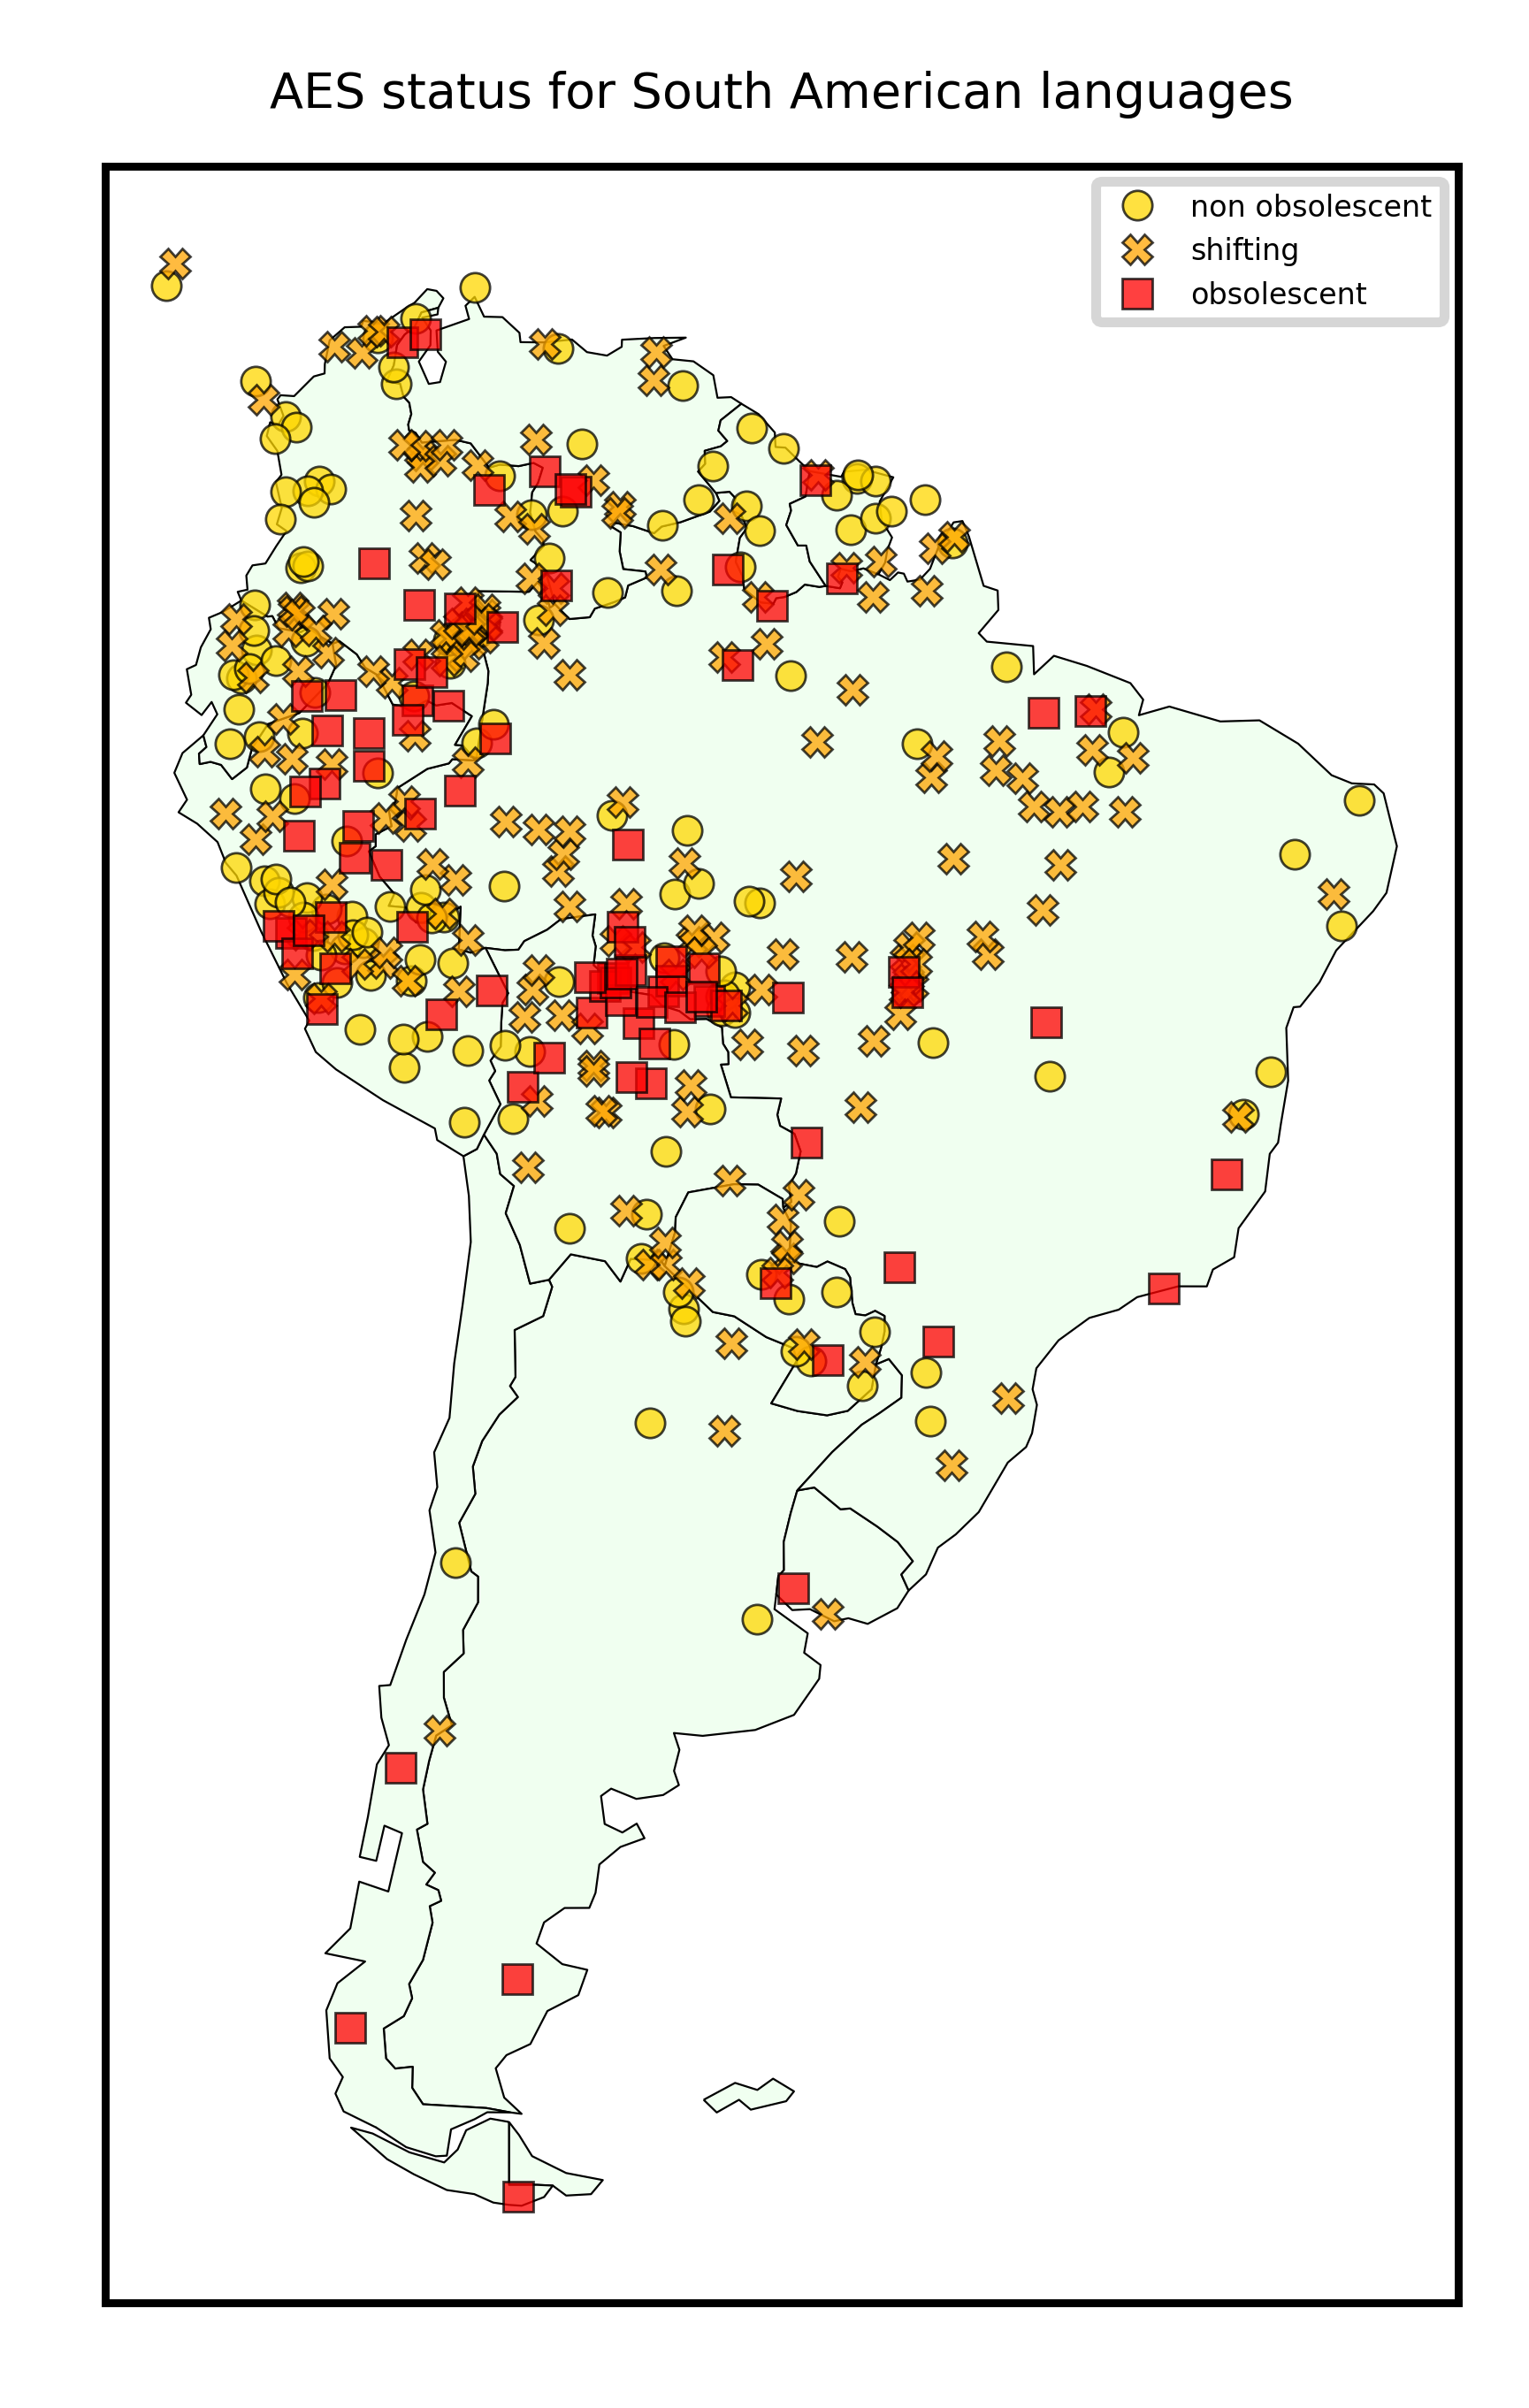

In [282]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

ax.set_aspect('equal')
plt.title('AES status for South American languages',fontsize=5)
world.plot(ax=ax, color='honeydew', edgecolor='k',linewidth=0.2)
    
#for group in labels_group.keys():
    
#    ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in labels.keys() and labels[language]==group]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in labels.keys() and labels[language]==group]],marker=colors_group[group][1],color=colors_group[group][0],markersize=4,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='none',clip_on=True,label=group)

#for language in location.keys():
#    if language in languages_conflict:
#        ax.annotate(max(probs[language].round(2)), weight='demi', color='k', xy=(location[language][1],location[language][0]), fontsize=2.5, alpha=0.85)

for fam in ['non obsolescent','shifting','obsolescent']:
    #if fam!='extinct':
    ax.plot([x[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in status.keys() and status[language]==fam]],[y[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in status.keys() and status[language]==fam]],marker=colors[fam][1],color=colors[fam][0],markersize=3,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='full',clip_on=True,label=fam)

#ax.plot([x[i] for i in [list(LL_families.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],'*',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='North America')
#ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if (language not in id_family.keys()) or (language in id_family.keys() and id_family[language] not in families)]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if (language not in id_family.keys()) or (language in id_family.keys() and id_family[language] not in families)]],marker='x',color='k',markersize=3,markeredgewidth=1,markeredgecolor='k',alpha=0.65,linewidth=0,fillstyle='full',clip_on=True,label='Others')

plt.legend(loc='best',fontsize=3)
ax.set_yticks([])
ax.set_xticks([])
plt.savefig('map-obsolescence/mapa_obs_shifting.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [283]:
len(status)

432

In [284]:
status_number = {}
for language in status.keys():
    if status[language]=='non obsolescent':
        status_number[language]=1
    elif status[language]=='shifting':
        status_number[language]=0
    else:
        status_number[language]=-1

In [285]:
location = {key:location[key] for key in status.keys()}

In [286]:
len(location)

432

In [287]:
from math import radians, cos, sin, asin, sqrt

def location_distance(glotto1,glotto2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(location[glotto1][0])
    lon2 = radians(location[glotto2][0])
    lat1 = radians(location[glotto1][1])
    lat2 = radians(location[glotto2][1])
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)

In [288]:
## grafos!!!
import networkx as nx

def GRAPH_knn(k):
    
    D = {lengua:{} for lengua in status.keys()}
    for lengua in status.keys():
        for lengualengua in status.keys():
            H = location_distance(lengua,lengualengua)
            #if lengualengua in id_family.keys() and lengua in id_family.keys() and id_family[lengua] in F and id_family[lengualengua] in F and H!=-1:    
            D[lengua][lengualengua]=H
                    
    G=nx.Graph()
    for key in D.keys():
        D_ordered = list({k: v for k, v in sorted(D[key].items(), key=lambda item: item[1],reverse=False)}.items())[1:k+1]
        D_ordered = [item[0] for item in D_ordered]
        for keykey in D_ordered:
            if G.has_edge(key,keykey)==False:
                G.add_edge(key,keykey,weight=D[key][keykey])
    
    return G

In [289]:
graphs = {}

for k in [3,4,5,6,7,8,9,10]:
    G=GRAPH_knn(k)
    graphs[k]=G

In [290]:
graphs

{3: <networkx.classes.graph.Graph at 0x7f1b72ceacd0>,
 4: <networkx.classes.graph.Graph at 0x7f1ba37f5fd0>,
 5: <networkx.classes.graph.Graph at 0x7f1b8fae8ca0>,
 6: <networkx.classes.graph.Graph at 0x7f1b72cce9a0>,
 7: <networkx.classes.graph.Graph at 0x7f1be6e2a1f0>,
 8: <networkx.classes.graph.Graph at 0x7f1be20aac70>,
 9: <networkx.classes.graph.Graph at 0x7f1b9c99f220>,
 10: <networkx.classes.graph.Graph at 0x7f1ba2685c70>}

In [291]:
distances_status = {k:{} for k in graphs.keys()}

for k in graphs.keys():
    G=graphs[k]
    for node in G.nodes():
        D = 0
        for nodes in dict(G[node]).keys():
            H = status_number[nodes]
            if H==-1:
                D+=1
        distances_status[k][node]=D/len(dict(G[node]).keys())

In [292]:
## influencia de k en la medición de lenguas obsolescentes!!!
import numpy as np

obs_k = {}

for k in graphs.keys():
    L = [distances_status[k][key] for key in status_number.keys() if status[key]=='obsolescent']
    print(np.mean(L))
    obs_k[k] = L

0.301498127340824
0.3157303370786517
0.3075575173889781
0.3147672552166934
0.30512209388613887
0.30943928106849455
0.3079210271626002
0.31046359823623537


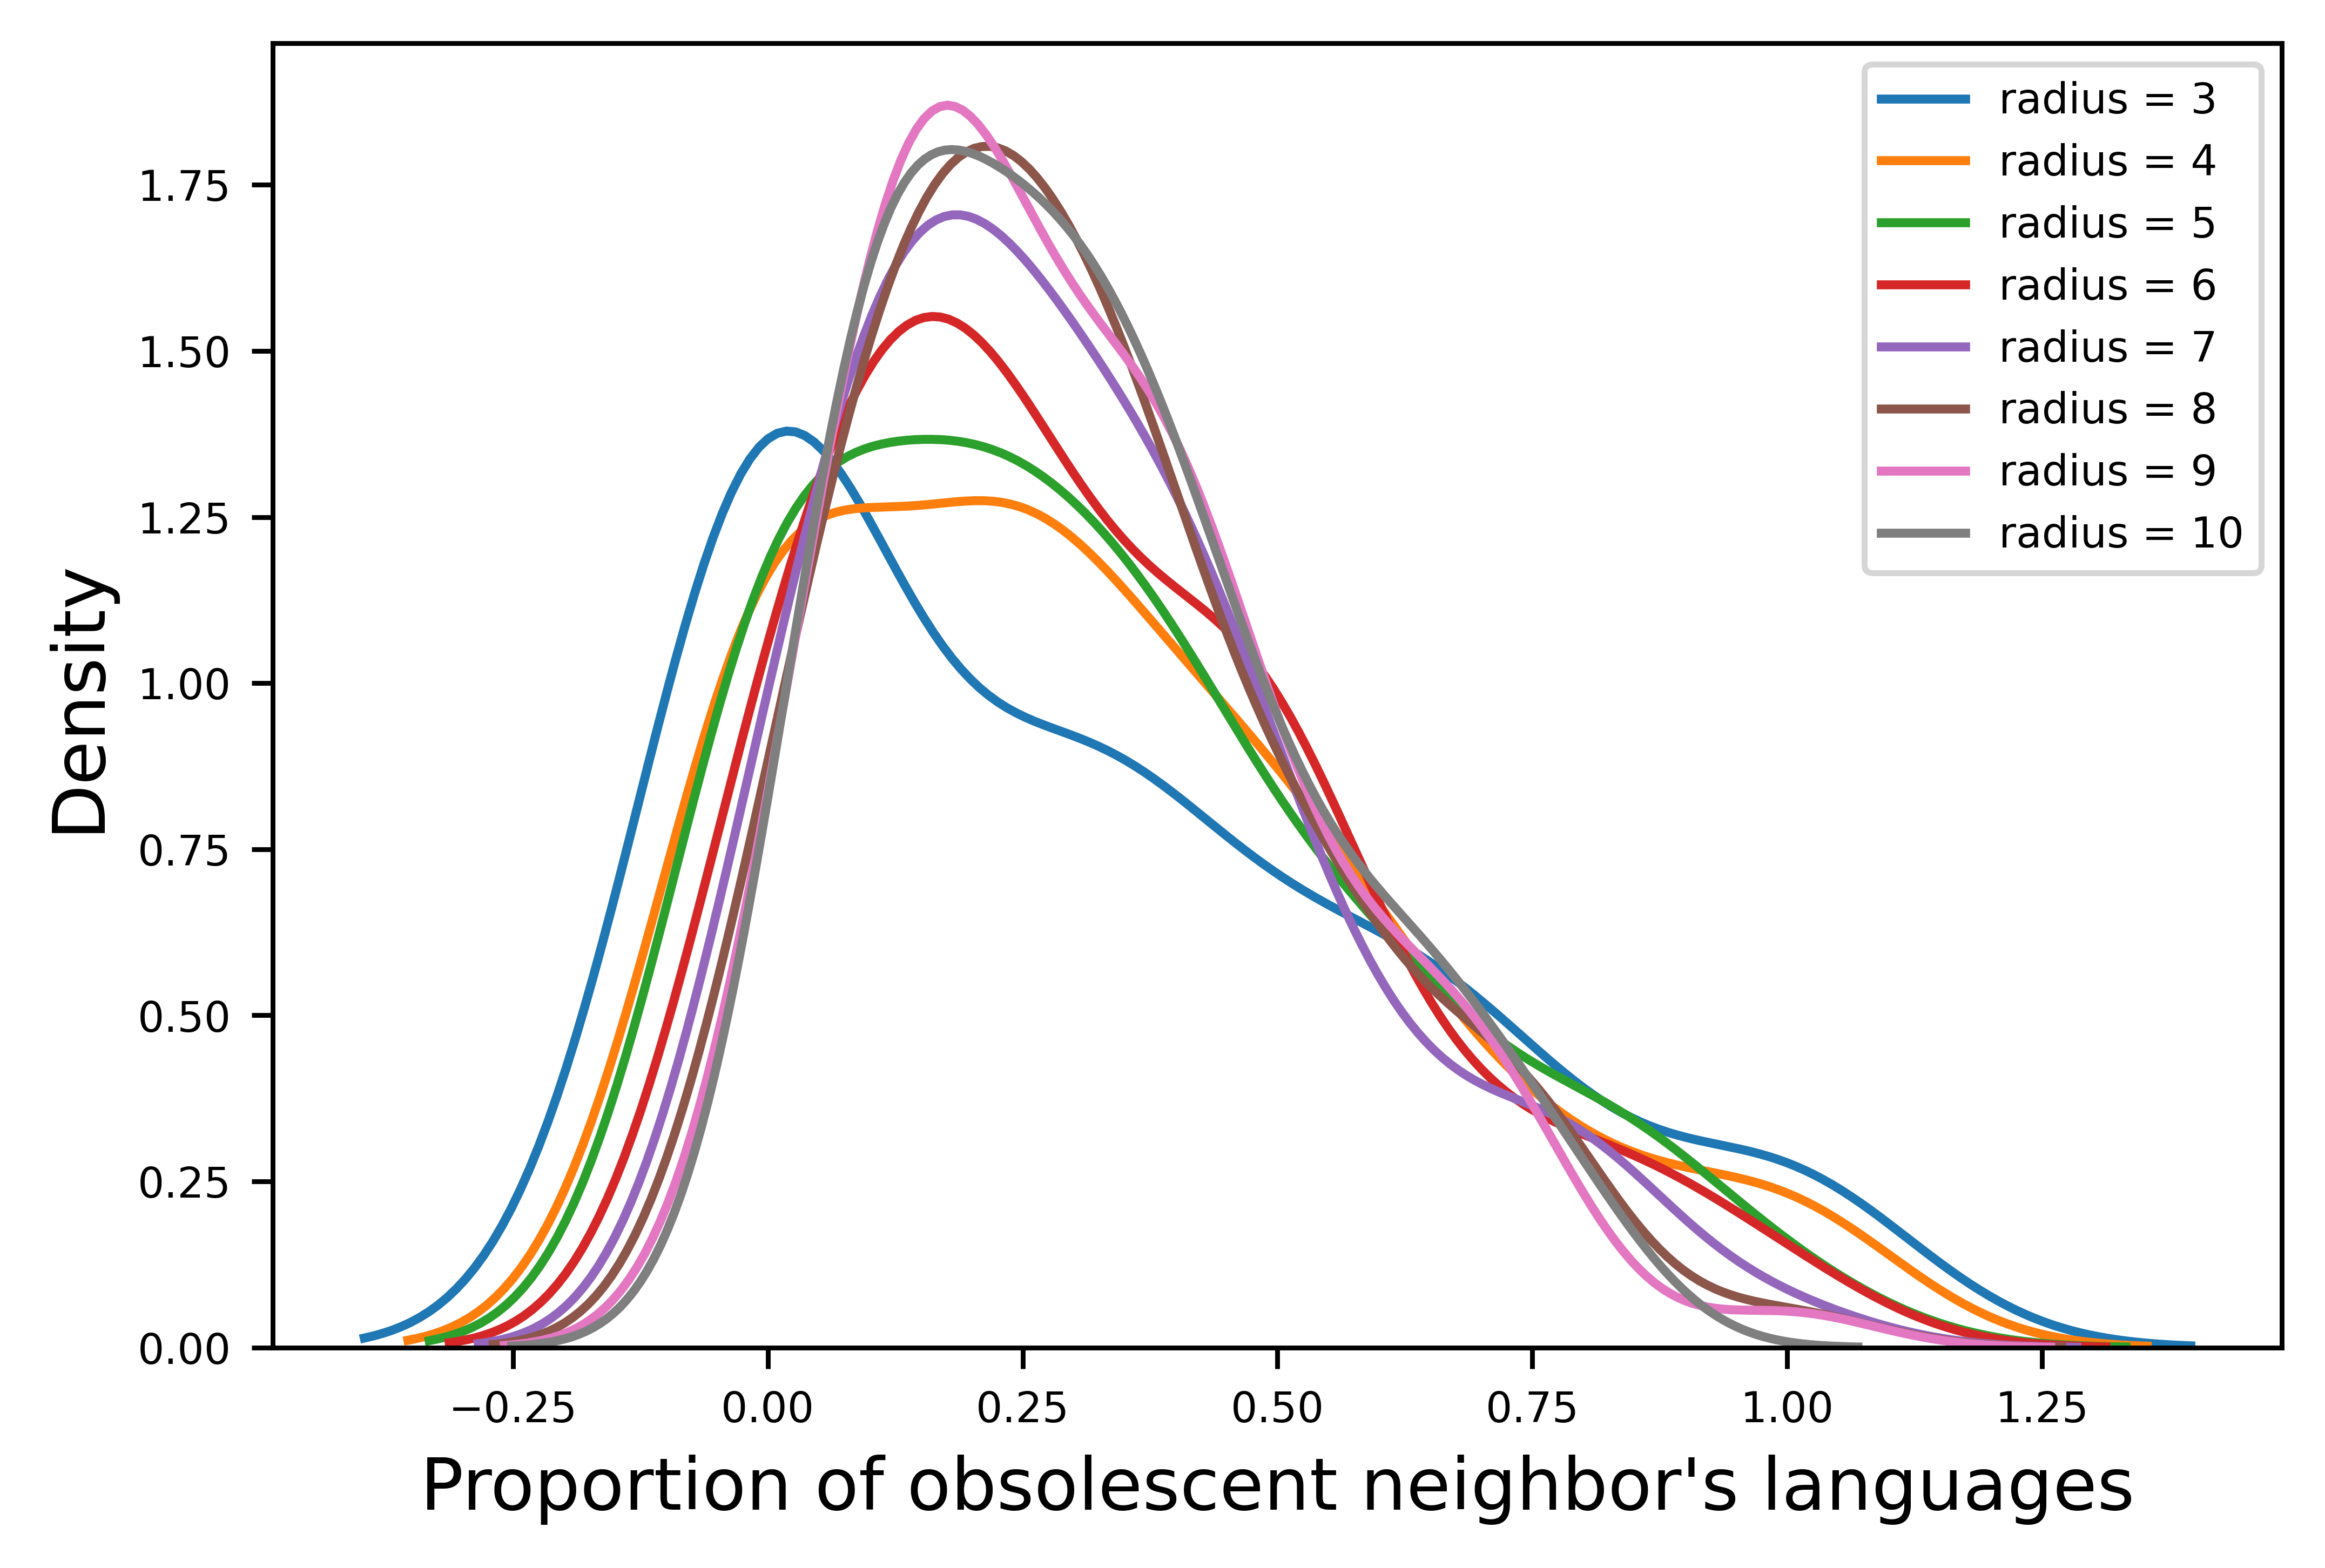

In [293]:
import seaborn as sns
fig, ax = plt.subplots(dpi=800)
#sns.set(style="darkgrid")
for k in obs_k.keys():
# plotting both distibutions on the same figure
    sns.kdeplot(obs_k[k], label = 'radius = '+str(k),shade=False)
#plt.grid(False)
plt.legend(loc='best',fontsize=7)
plt.ylabel(r'Density',fontsize=12)
plt.xlabel(r"Proportion of obsolescent neighbor's languages",fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('map-obsolescence/H.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [294]:
import numpy as np

k = 5
x,y = [],[]
codes = []

for key in distances_status[k].keys():
    codes+=[key]
    x+=[location[key][1]]
    y+=[location[key][0]]

c = [distances_status[k][code] for code in codes]
n = {}

for i in np.linspace(0,1,100):
    n[i]=[code for code in codes if distances_status[k][code]>i and status_number[code]==-1]

In [295]:
print(min(c),max(c))

0.0 1.0


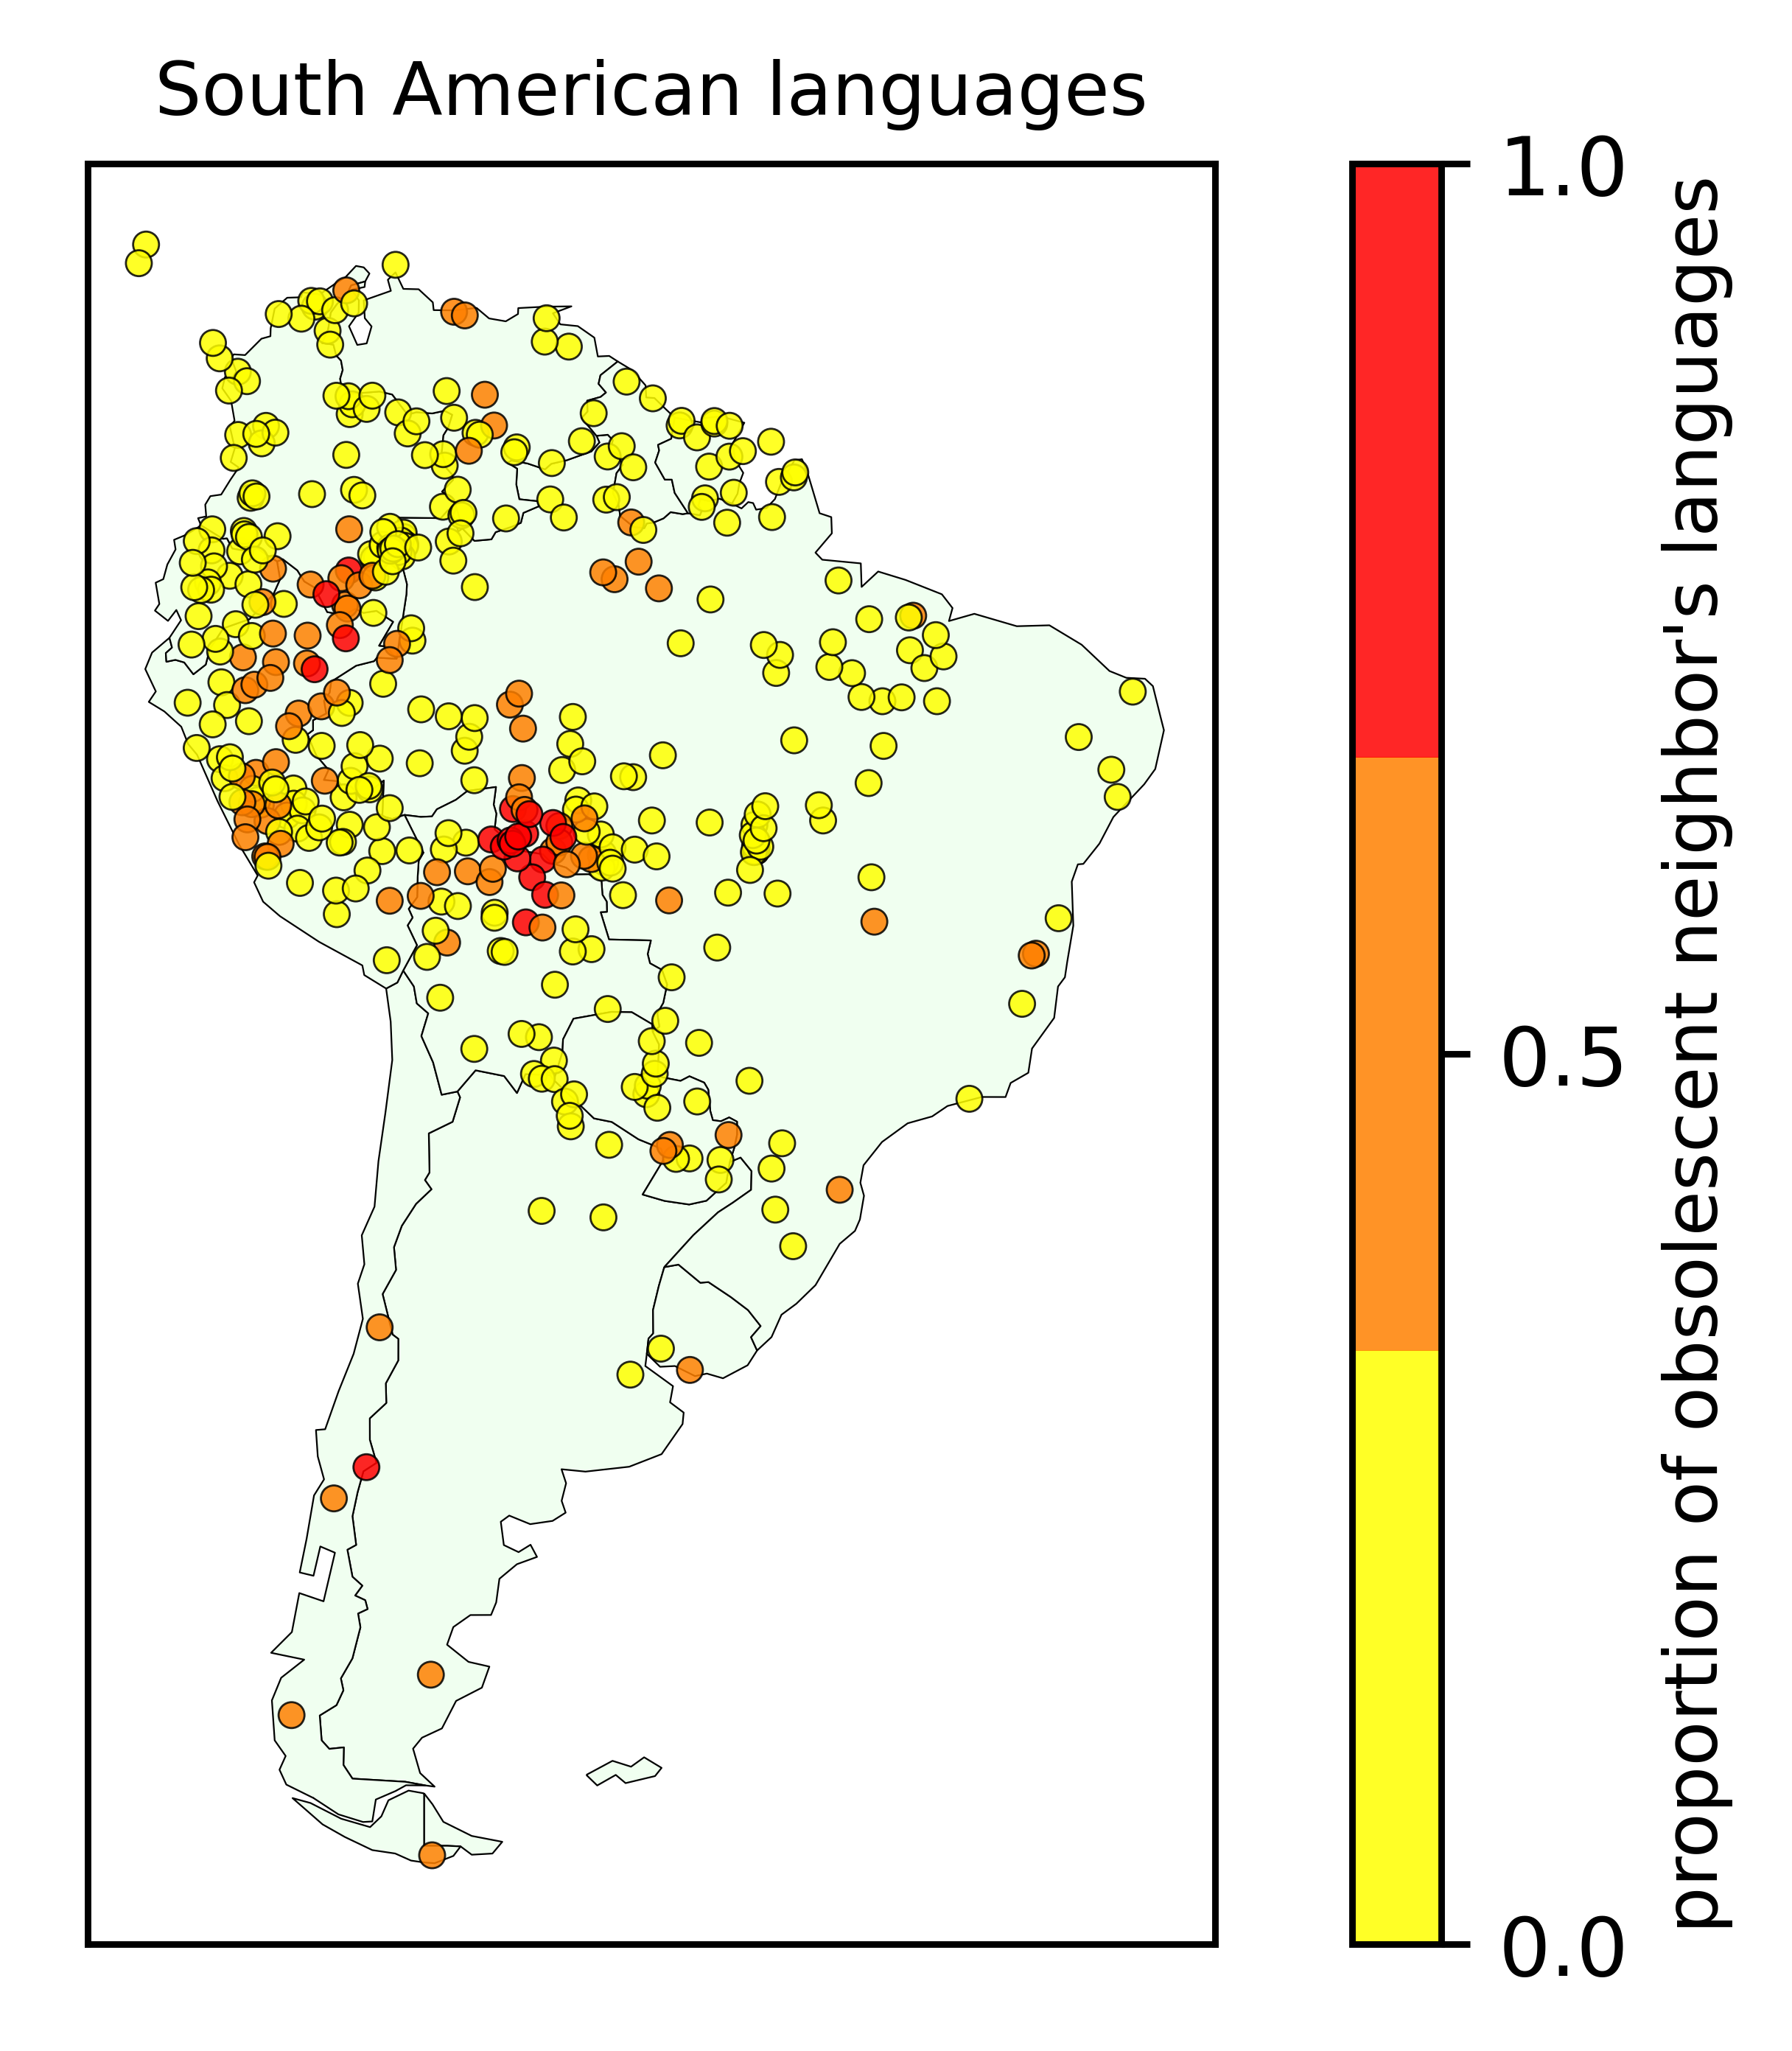

In [296]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(dpi=800)

ax.set_aspect('equal')
plt.title('South American languages',fontsize=9)
world.plot(ax=ax, color='honeydew', edgecolor='k',linewidth=0.2)
    
#for group in labels_group.keys():
    
#    ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in labels.keys() and labels[language]==group]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in labels.keys() and labels[language]==group]],marker=colors_group[group][1],color=colors_group[group][0],markersize=4,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='none',clip_on=True,label=group)

#for language in location.keys():
#    if language in languages_conflict:
#        ax.annotate(max(probs[language].round(2)), weight='demi', color='k', xy=(location[language][1],location[language][0]), fontsize=2.5, alpha=0.85)
plt.scatter(x,y, c=c, s=10, edgecolors='k',linewidths=0.25, cmap=plt.cm.get_cmap('autumn',3).reversed(),alpha=0.85)
cbar=plt.colorbar(ticks=range(3))
cbar.set_label(label=r"proportion of obsolescent neighbor's languages",fontsize=9)

plt.clim(min(c),max(c))
ticklabels = [round(min(c),2),round((min(c)+max(c))/2,2),round(max(c),2)]
cbar.set_ticks(np.linspace(min(c),max(c), len(ticklabels)))
cbar.set_ticklabels(ticklabels)
#for fam in ['non obsolescent','shifting','obsolescent']:
#    #if fam!='extinct':
#    ax.plot([x[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in status.keys() and status[language]==fam]],[y[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in status.keys() and status[language]==fam]],marker=colors[fam][1],color=colors[fam][0],markersize=3,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='full',clip_on=True,label=fam)

#ax.plot([x[i] for i in [list(LL_families.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],'*',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='North America')
#ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if (language not in id_family.keys()) or (language in id_family.keys() and id_family[language] not in families)]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if (language not in id_family.keys()) or (language in id_family.keys() and id_family[language] not in families)]],marker='x',color='k',markersize=3,markeredgewidth=1,markeredgecolor='k',alpha=0.65,linewidth=0,fillstyle='full',clip_on=True,label='Others')

#plt.legend(loc='best',fontsize=3)
ax.set_yticks([])
ax.set_xticks([])
plt.savefig('map-obsolescence/mapa_local.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [297]:
number_obs = {}

for i in n.keys():
    number_obs[i]=len(n[i])/(len([code for code in codes if status_number[code]==-1]))

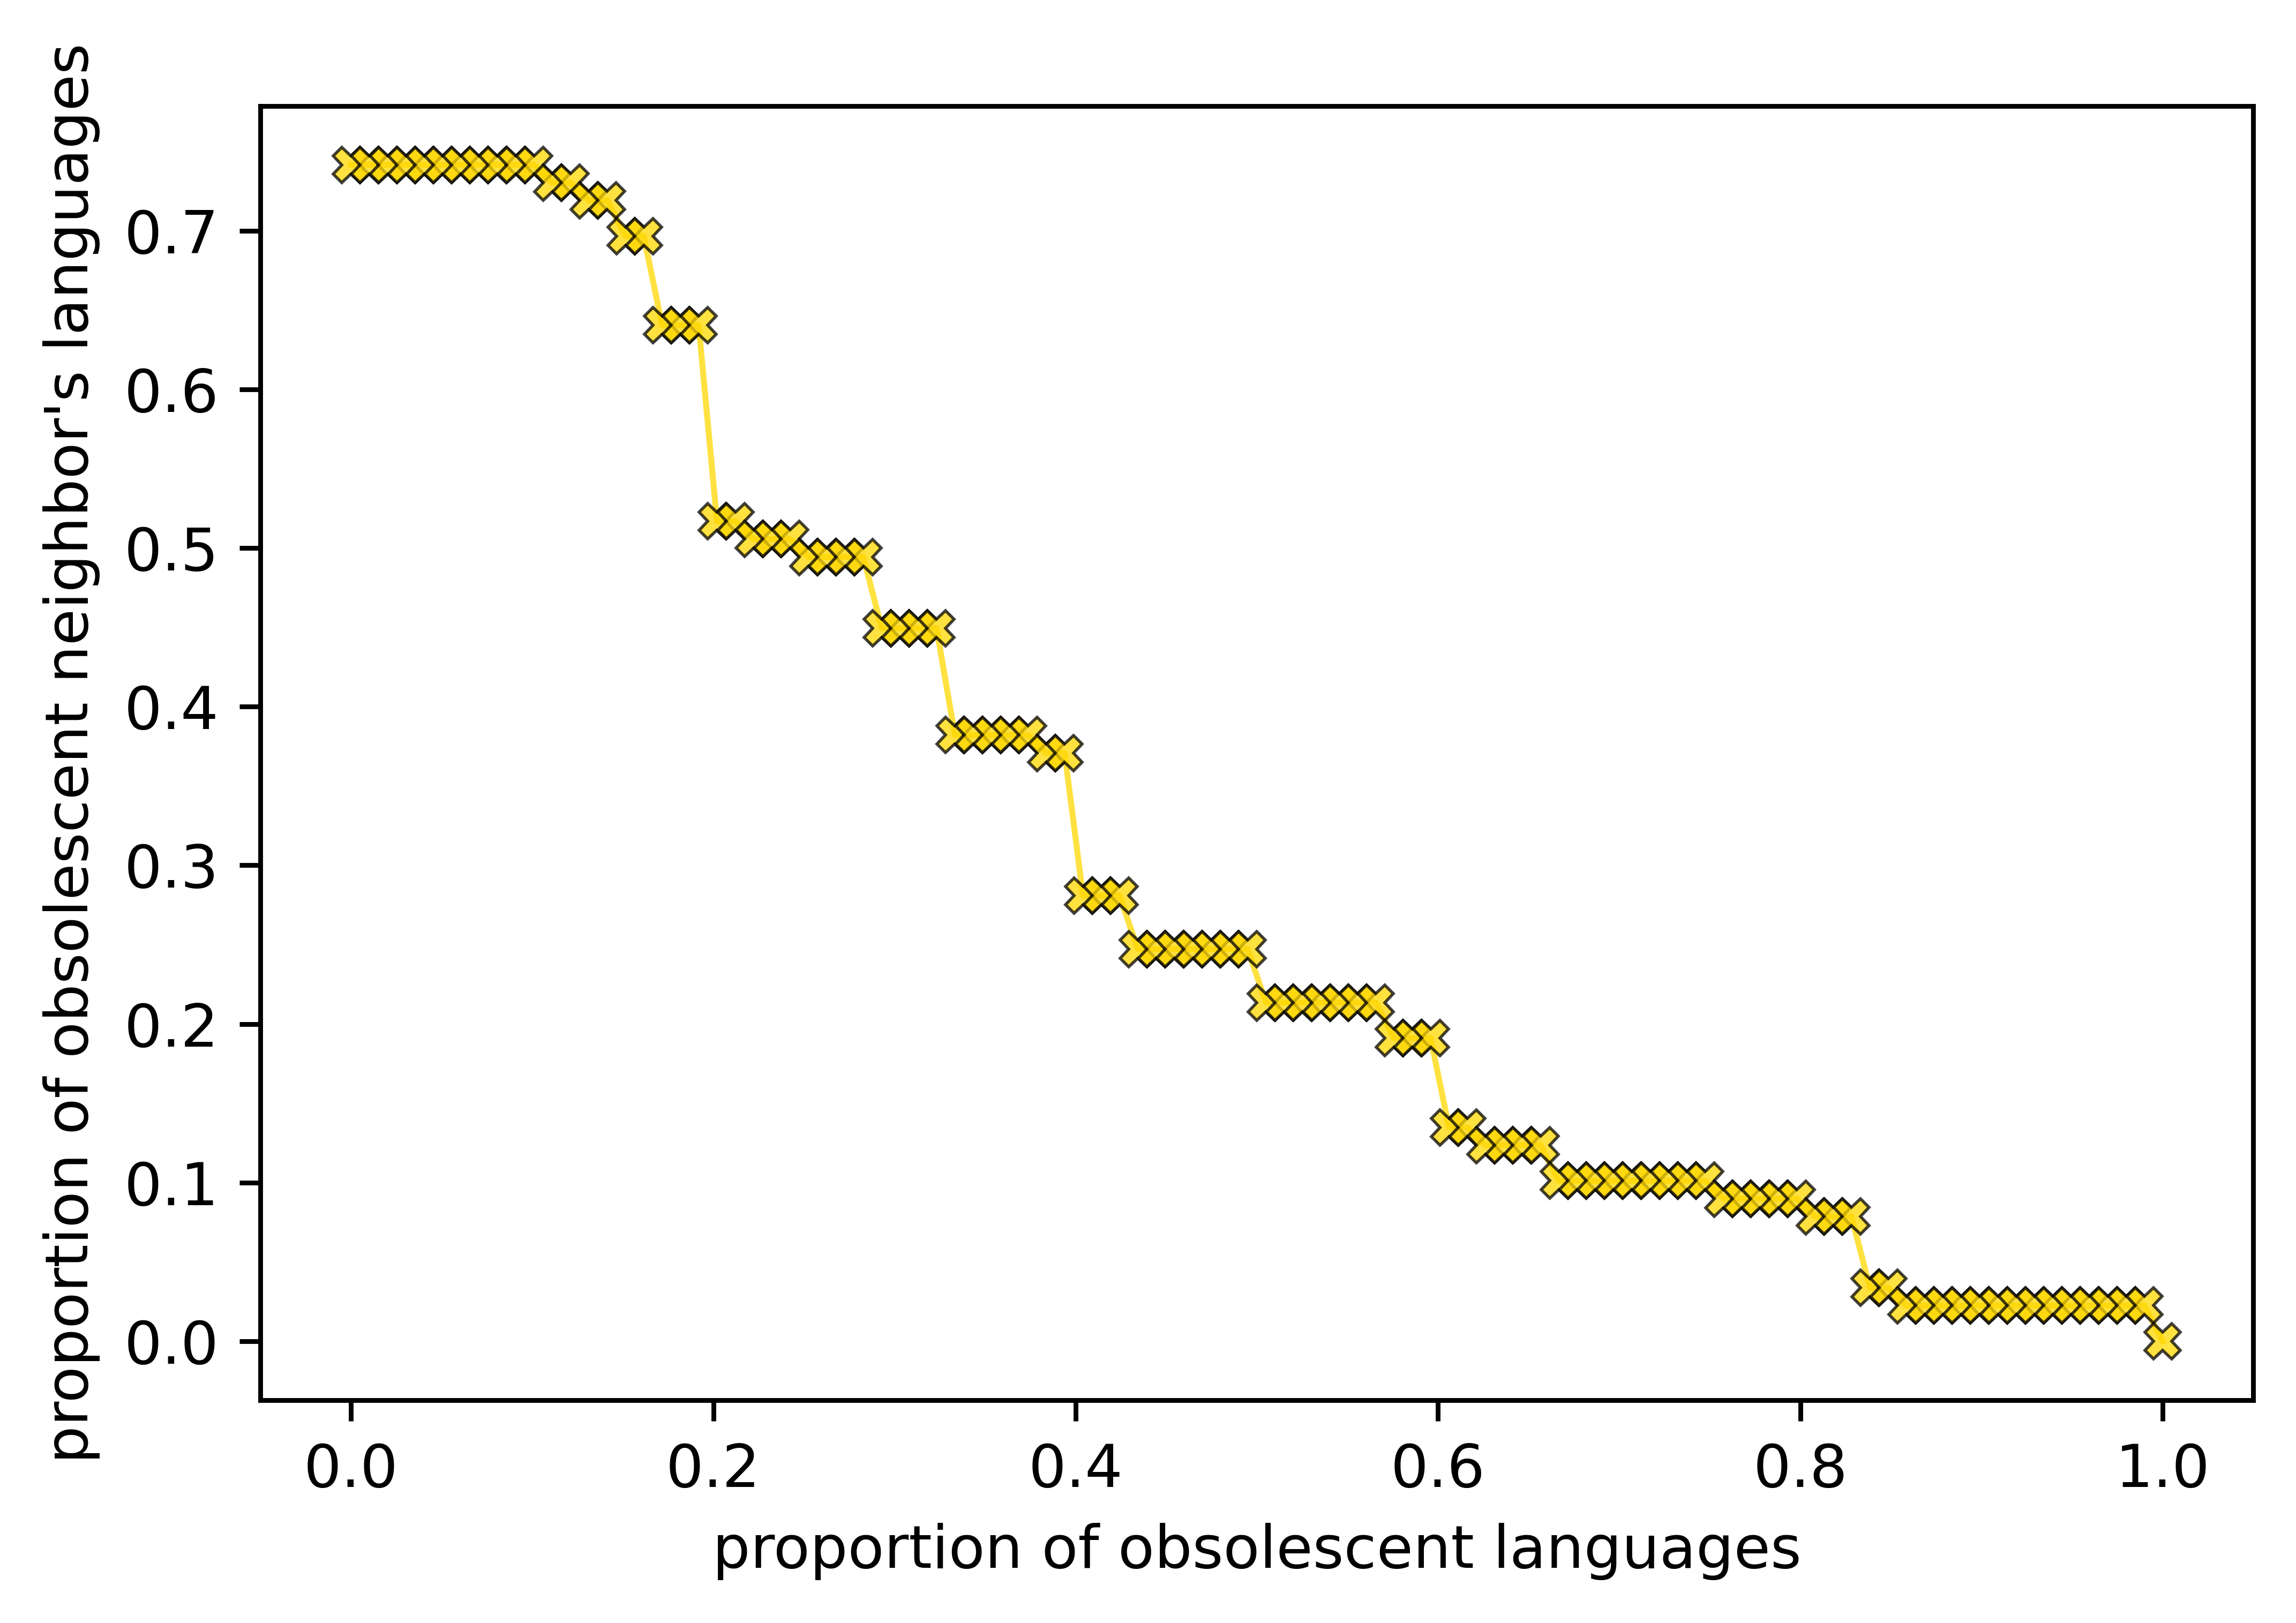

In [298]:
fig, ax = plt.subplots(dpi=800)
#plt.title('obsolescent languages',fontsize=12)
ax.plot(number_obs.keys(),number_obs.values(),marker='X',color='gold',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full',clip_on=True)

#ax.plot(X,Y,marker='x',color='k',markersize=6,markeredgewidth=1,markeredgecolor='k',alpha=0.85,linewidth=0,fillstyle='full',clip_on=True,label='Others')

#plt.grid(False)
#plt.legend(loc='best',fontsize=7)
#plt.xticks(rotation=90)
plt.xlabel(r'proportion of obsolescent languages',fontsize=10)
plt.ylabel(r"proportion of obsolescent neighbor's languages",fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('H.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [299]:
k=5

X_non = [distances_status[k][key] for key in status_number.keys() if status[key]=='non obsolescent']
X_obs = [distances_status[k][key] for key in status_number.keys() if status[key]=='obsolescent']
X_shi = [distances_status[k][key] for key in status_number.keys() if status[key]=='shifting']

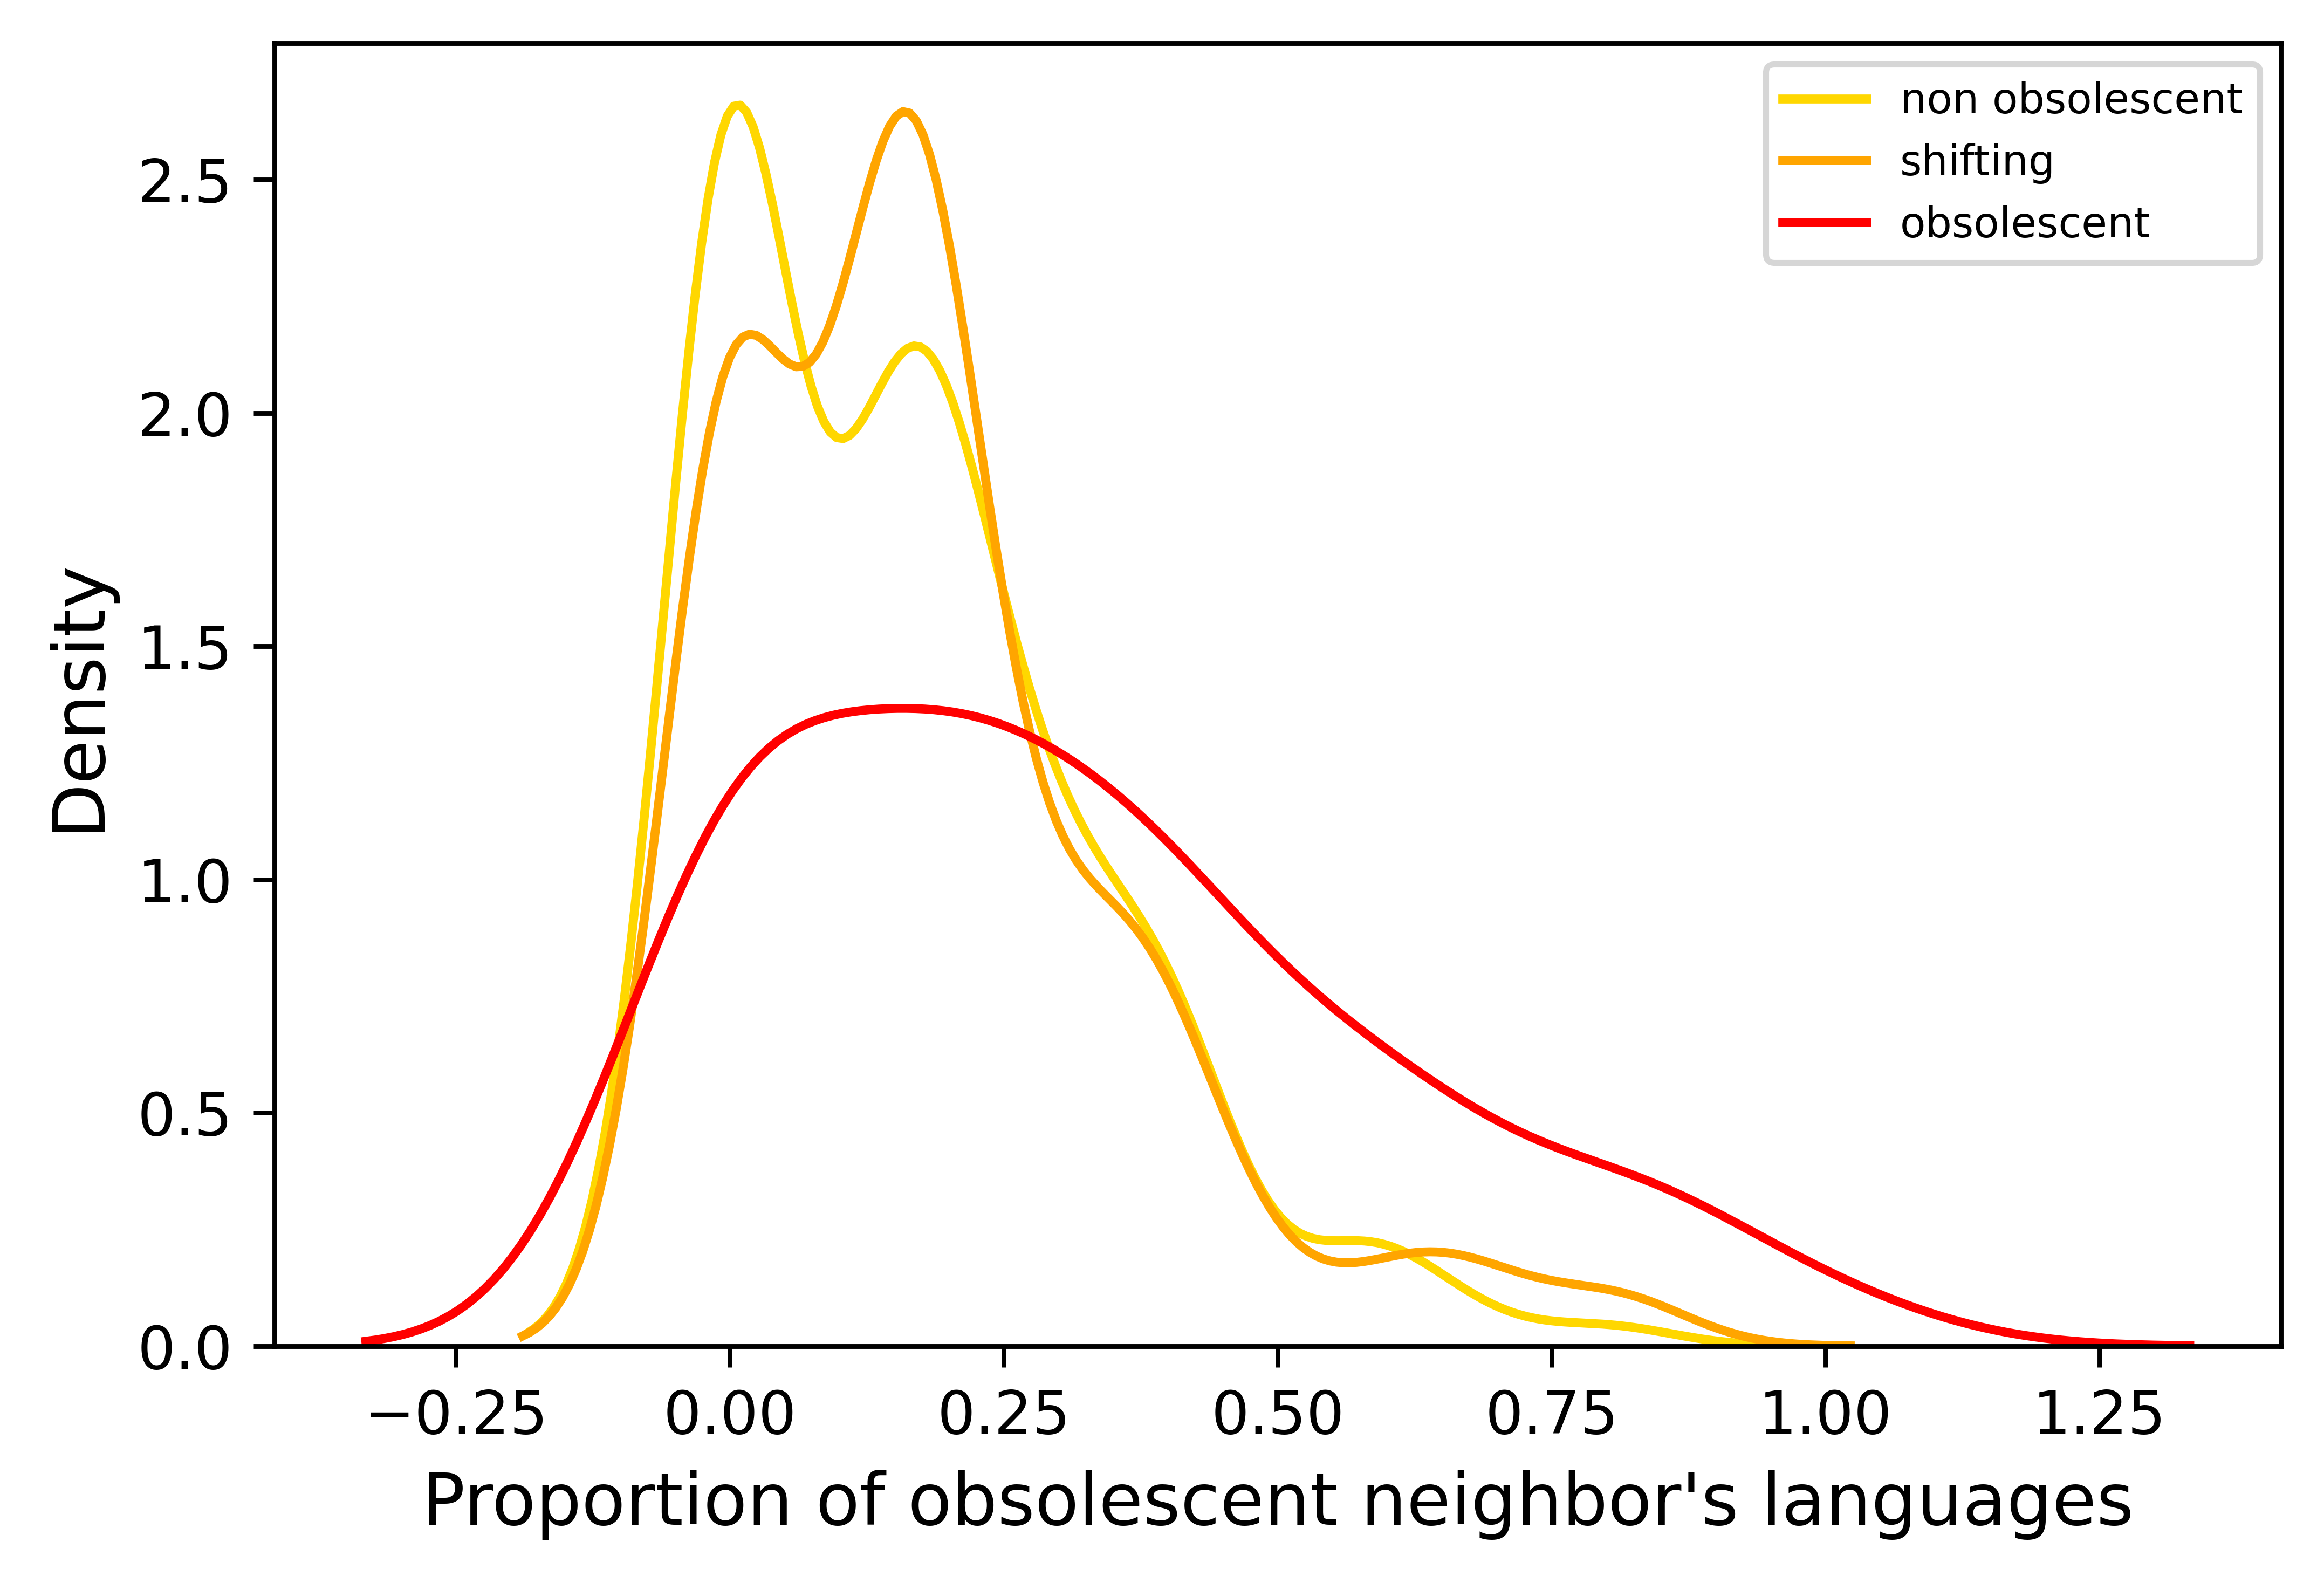

In [300]:
import seaborn as sns
fig, ax = plt.subplots(dpi=800)
#sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
sns.kdeplot(X_non, color="gold", label = 'non obsolescent',shade=False)
sns.kdeplot(X_shi, color="orange", label = 'shifting',shade=False)
sns.kdeplot(X_obs, color="r", label = 'obsolescent',shade=False)
#plt.grid(False)
plt.legend(loc='best',fontsize=7)
plt.ylabel(r'Density',fontsize=12)
plt.xlabel(r"Proportion of obsolescent neighbor's languages",fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('map-obsolescence/H-comp.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [301]:
import numpy as np

print(np.mean(X_non),np.std(X_non),np.mean(X_shi),np.std(X_shi),np.mean(X_obs),np.std(X_obs))

0.16029502904502904 0.16825233091815425 0.17921229097699687 0.1790035427578149 0.3075575173889781 0.27031594721864693


In [331]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(X_non,X_shi)
print('t=%.3f, p=%.3f' % (stat, p))
stat, p = ttest_ind(X_obs,X_shi)
print('t=%.3f, p=%.3f' % (stat, p))
stat, p = ttest_ind(X_obs,X_non)
print('t=%.3f, p=%.3f' % (stat, p))

t=-0.999, p=0.319
t=4.667, p=0.000
t=5.230, p=0.000


### familias!

In [303]:
status_families = {key:[] for key in status_groups.keys()}

In [304]:
for key in status_families:
    for language in status_groups[key]:
        if language in family_id.keys():
            status_families[key]+=[family_id[language]]

In [305]:
from collections import Counter

for key in status_families.keys():
    D=dict(Counter(status_families[key]))
    status_families[key]=dict(sorted(D.items(), key=lambda item: item[1], reverse=True))

In [306]:
OBS = status_families['obsolescent']
SHI = status_families['shifting']
NON = status_families['non obsolescent']

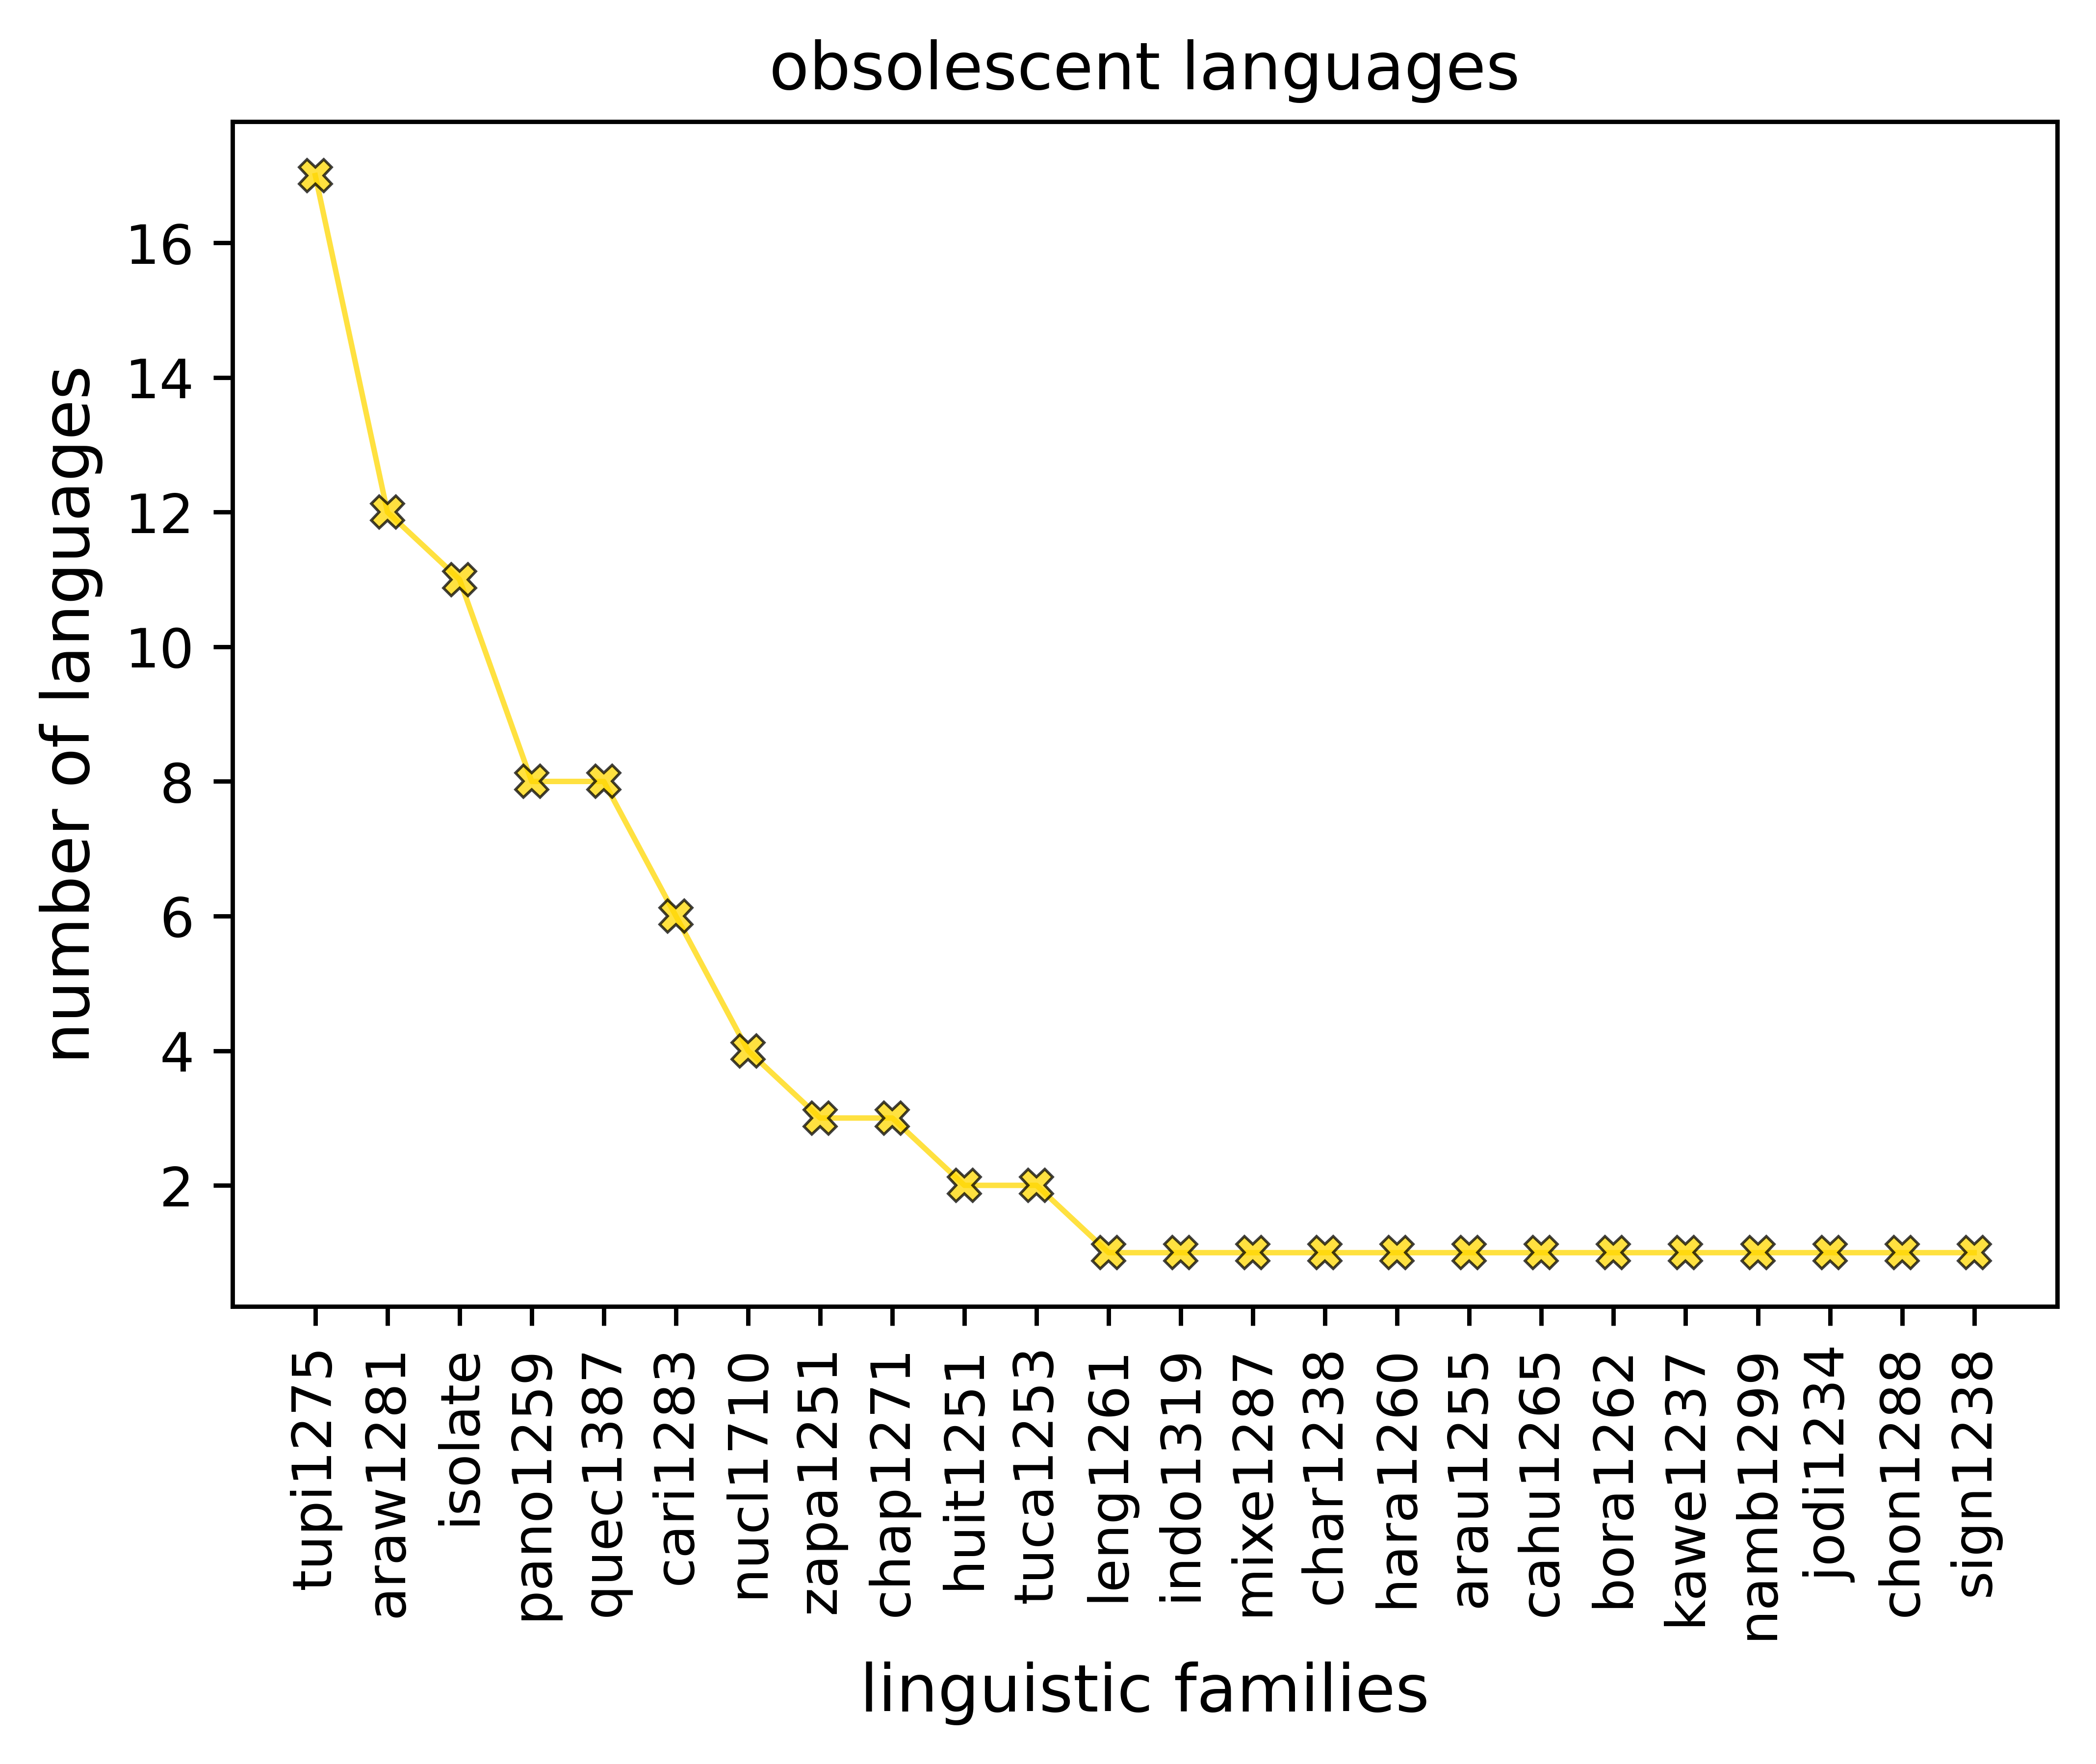

In [307]:
fig, ax = plt.subplots(dpi=800)
plt.title('obsolescent languages',fontsize=12)
ax.plot(OBS.keys(),OBS.values(),marker='X',color='gold',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full',clip_on=True)

#ax.plot(X,Y,marker='x',color='k',markersize=6,markeredgewidth=1,markeredgecolor='k',alpha=0.85,linewidth=0,fillstyle='full',clip_on=True,label='Others')

#plt.grid(False)
#plt.legend(loc='best',fontsize=7)
plt.xticks(rotation=90)
plt.ylabel(r'number of languages',fontsize=12)
plt.xlabel(r'linguistic families',fontsize=12)
plt.rcParams.update({'font.size': 7})
plt.savefig('map-obsolescence/obs-fam.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

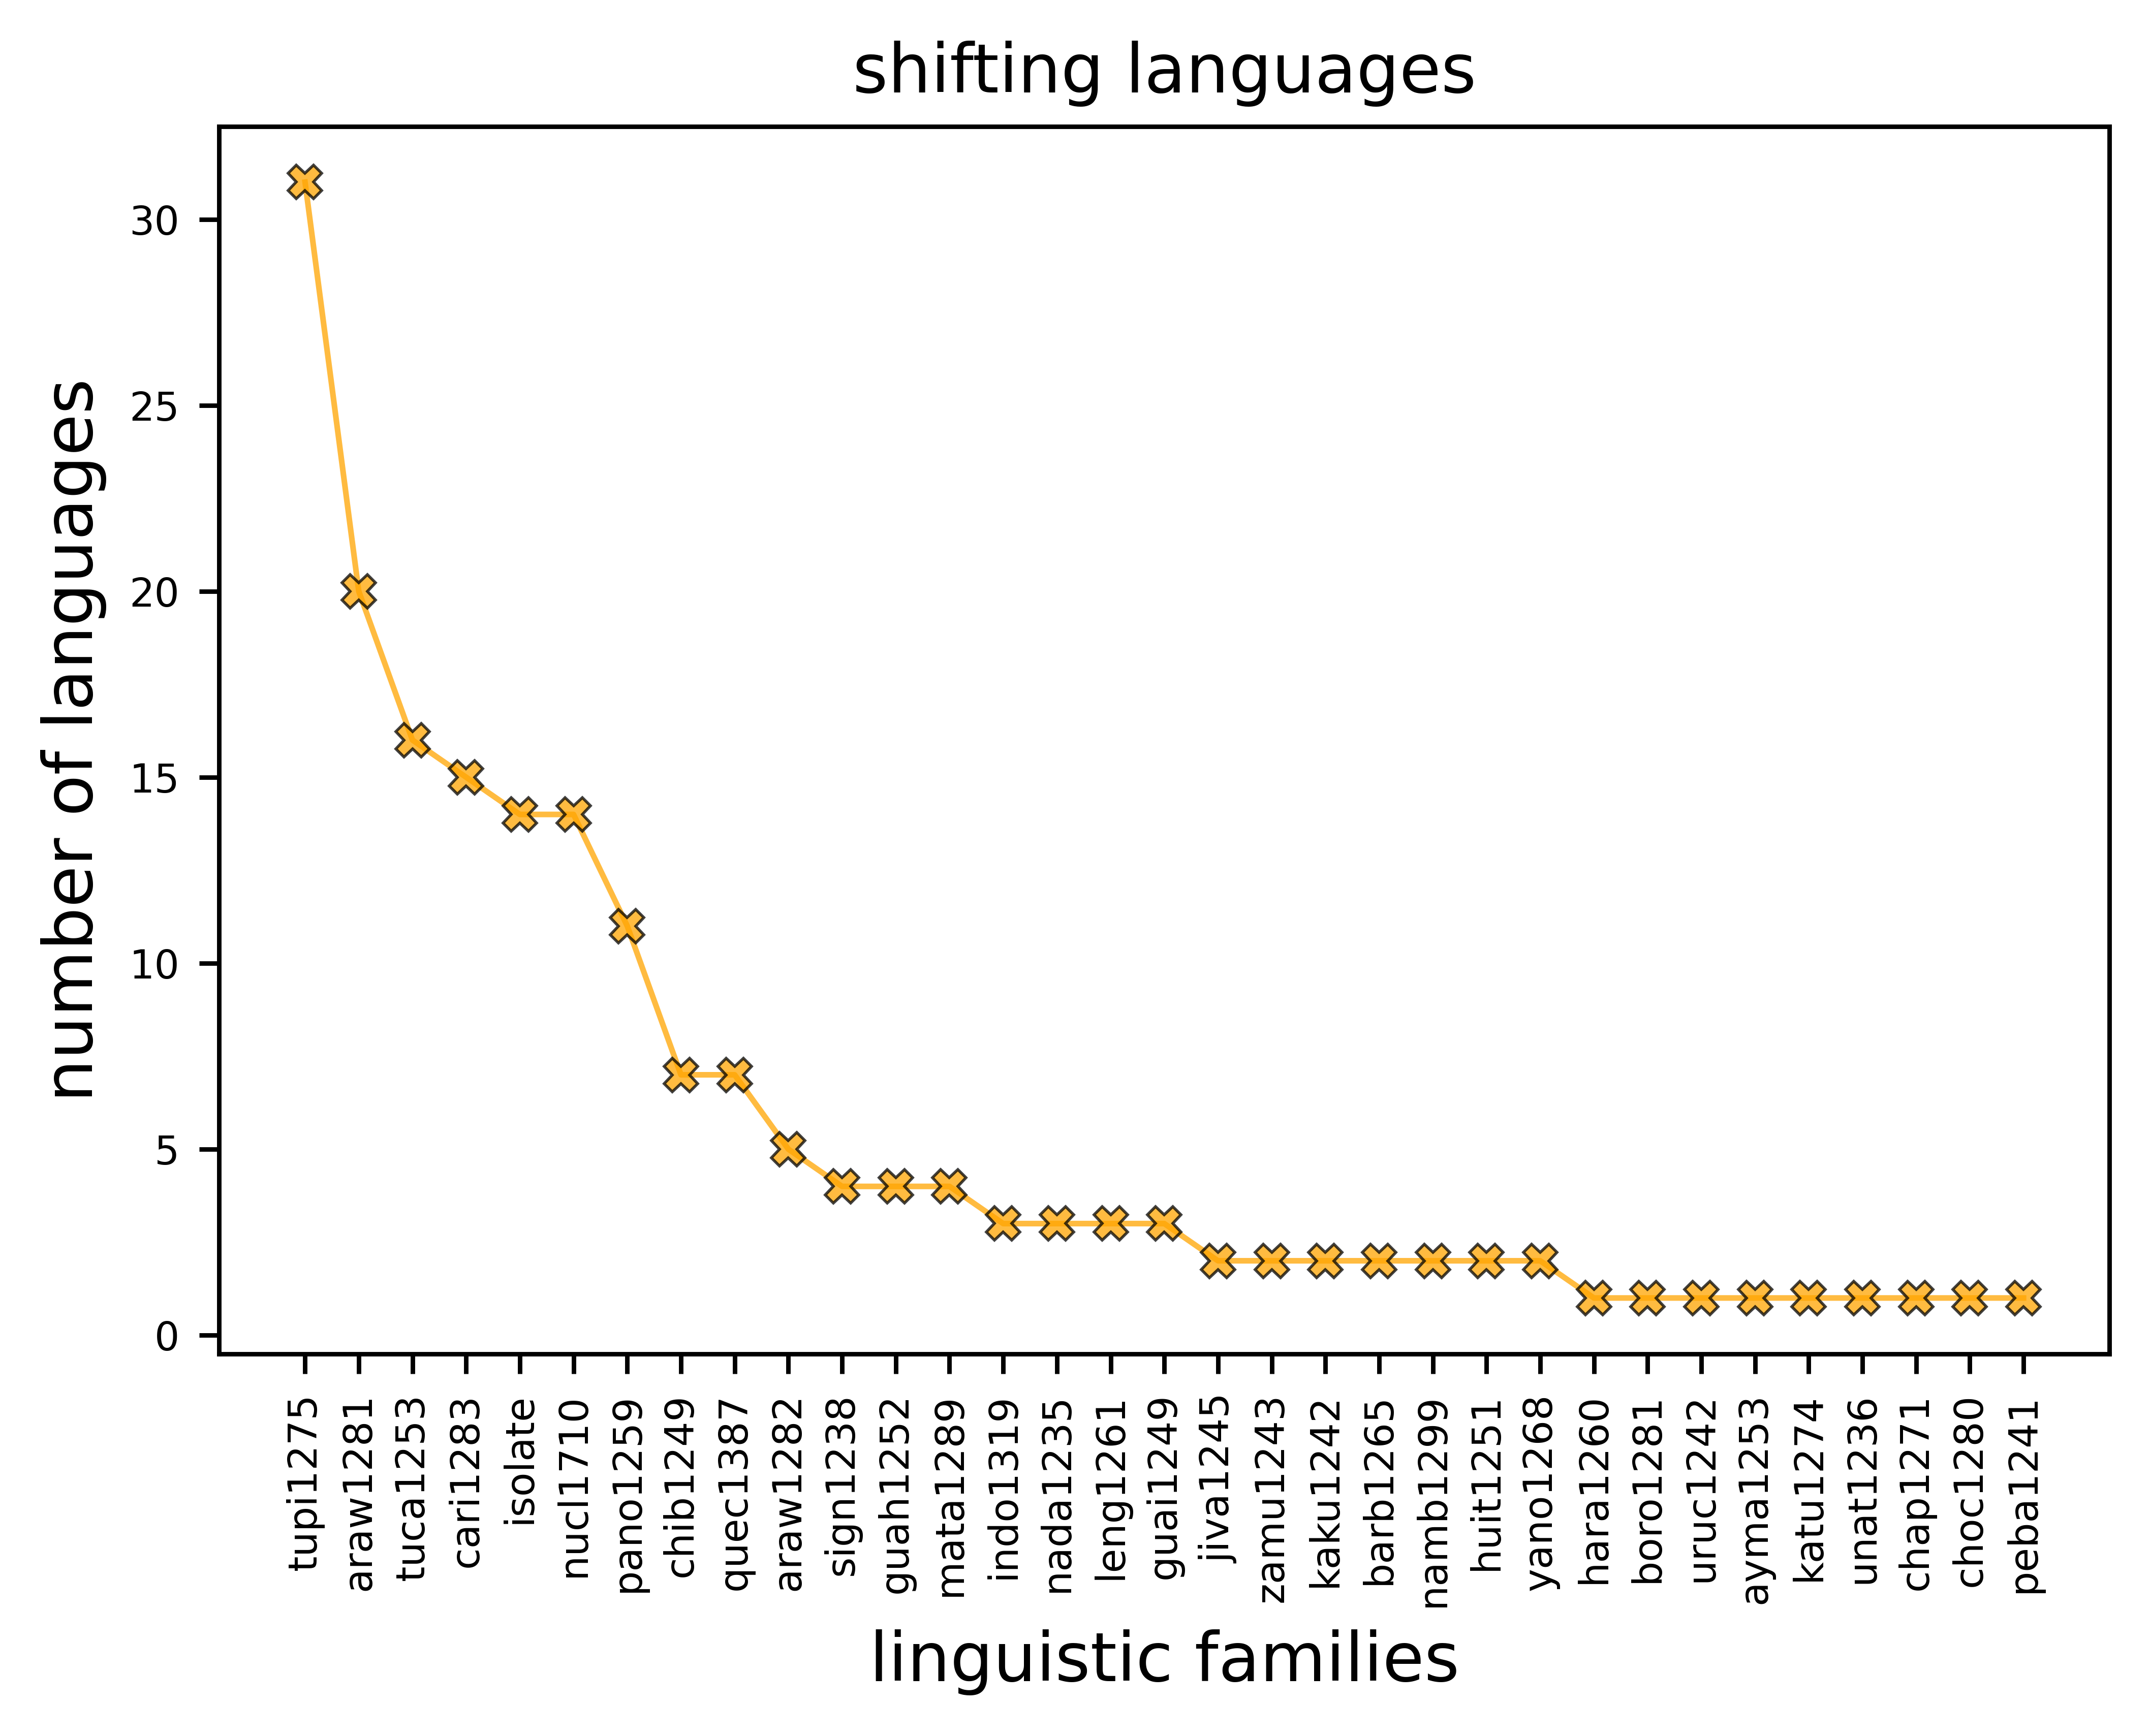

In [308]:
fig, ax = plt.subplots(dpi=800)
plt.title('shifting languages',fontsize=12)
ax.plot(SHI.keys(),SHI.values(),marker='X',color='orange',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full',clip_on=True)

#ax.plot(X,Y,marker='x',color='k',markersize=6,markeredgewidth=1,markeredgecolor='k',alpha=0.85,linewidth=0,fillstyle='full',clip_on=True,label='Others')

#plt.grid(False)
#plt.legend(loc='best',fontsize=7)
plt.xticks(rotation=90)
plt.ylabel(r'number of languages',fontsize=12)
plt.xlabel(r'linguistic families',fontsize=12)
plt.rcParams.update({'font.size': 7})
plt.savefig('map-obsolescence/shi-fam.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

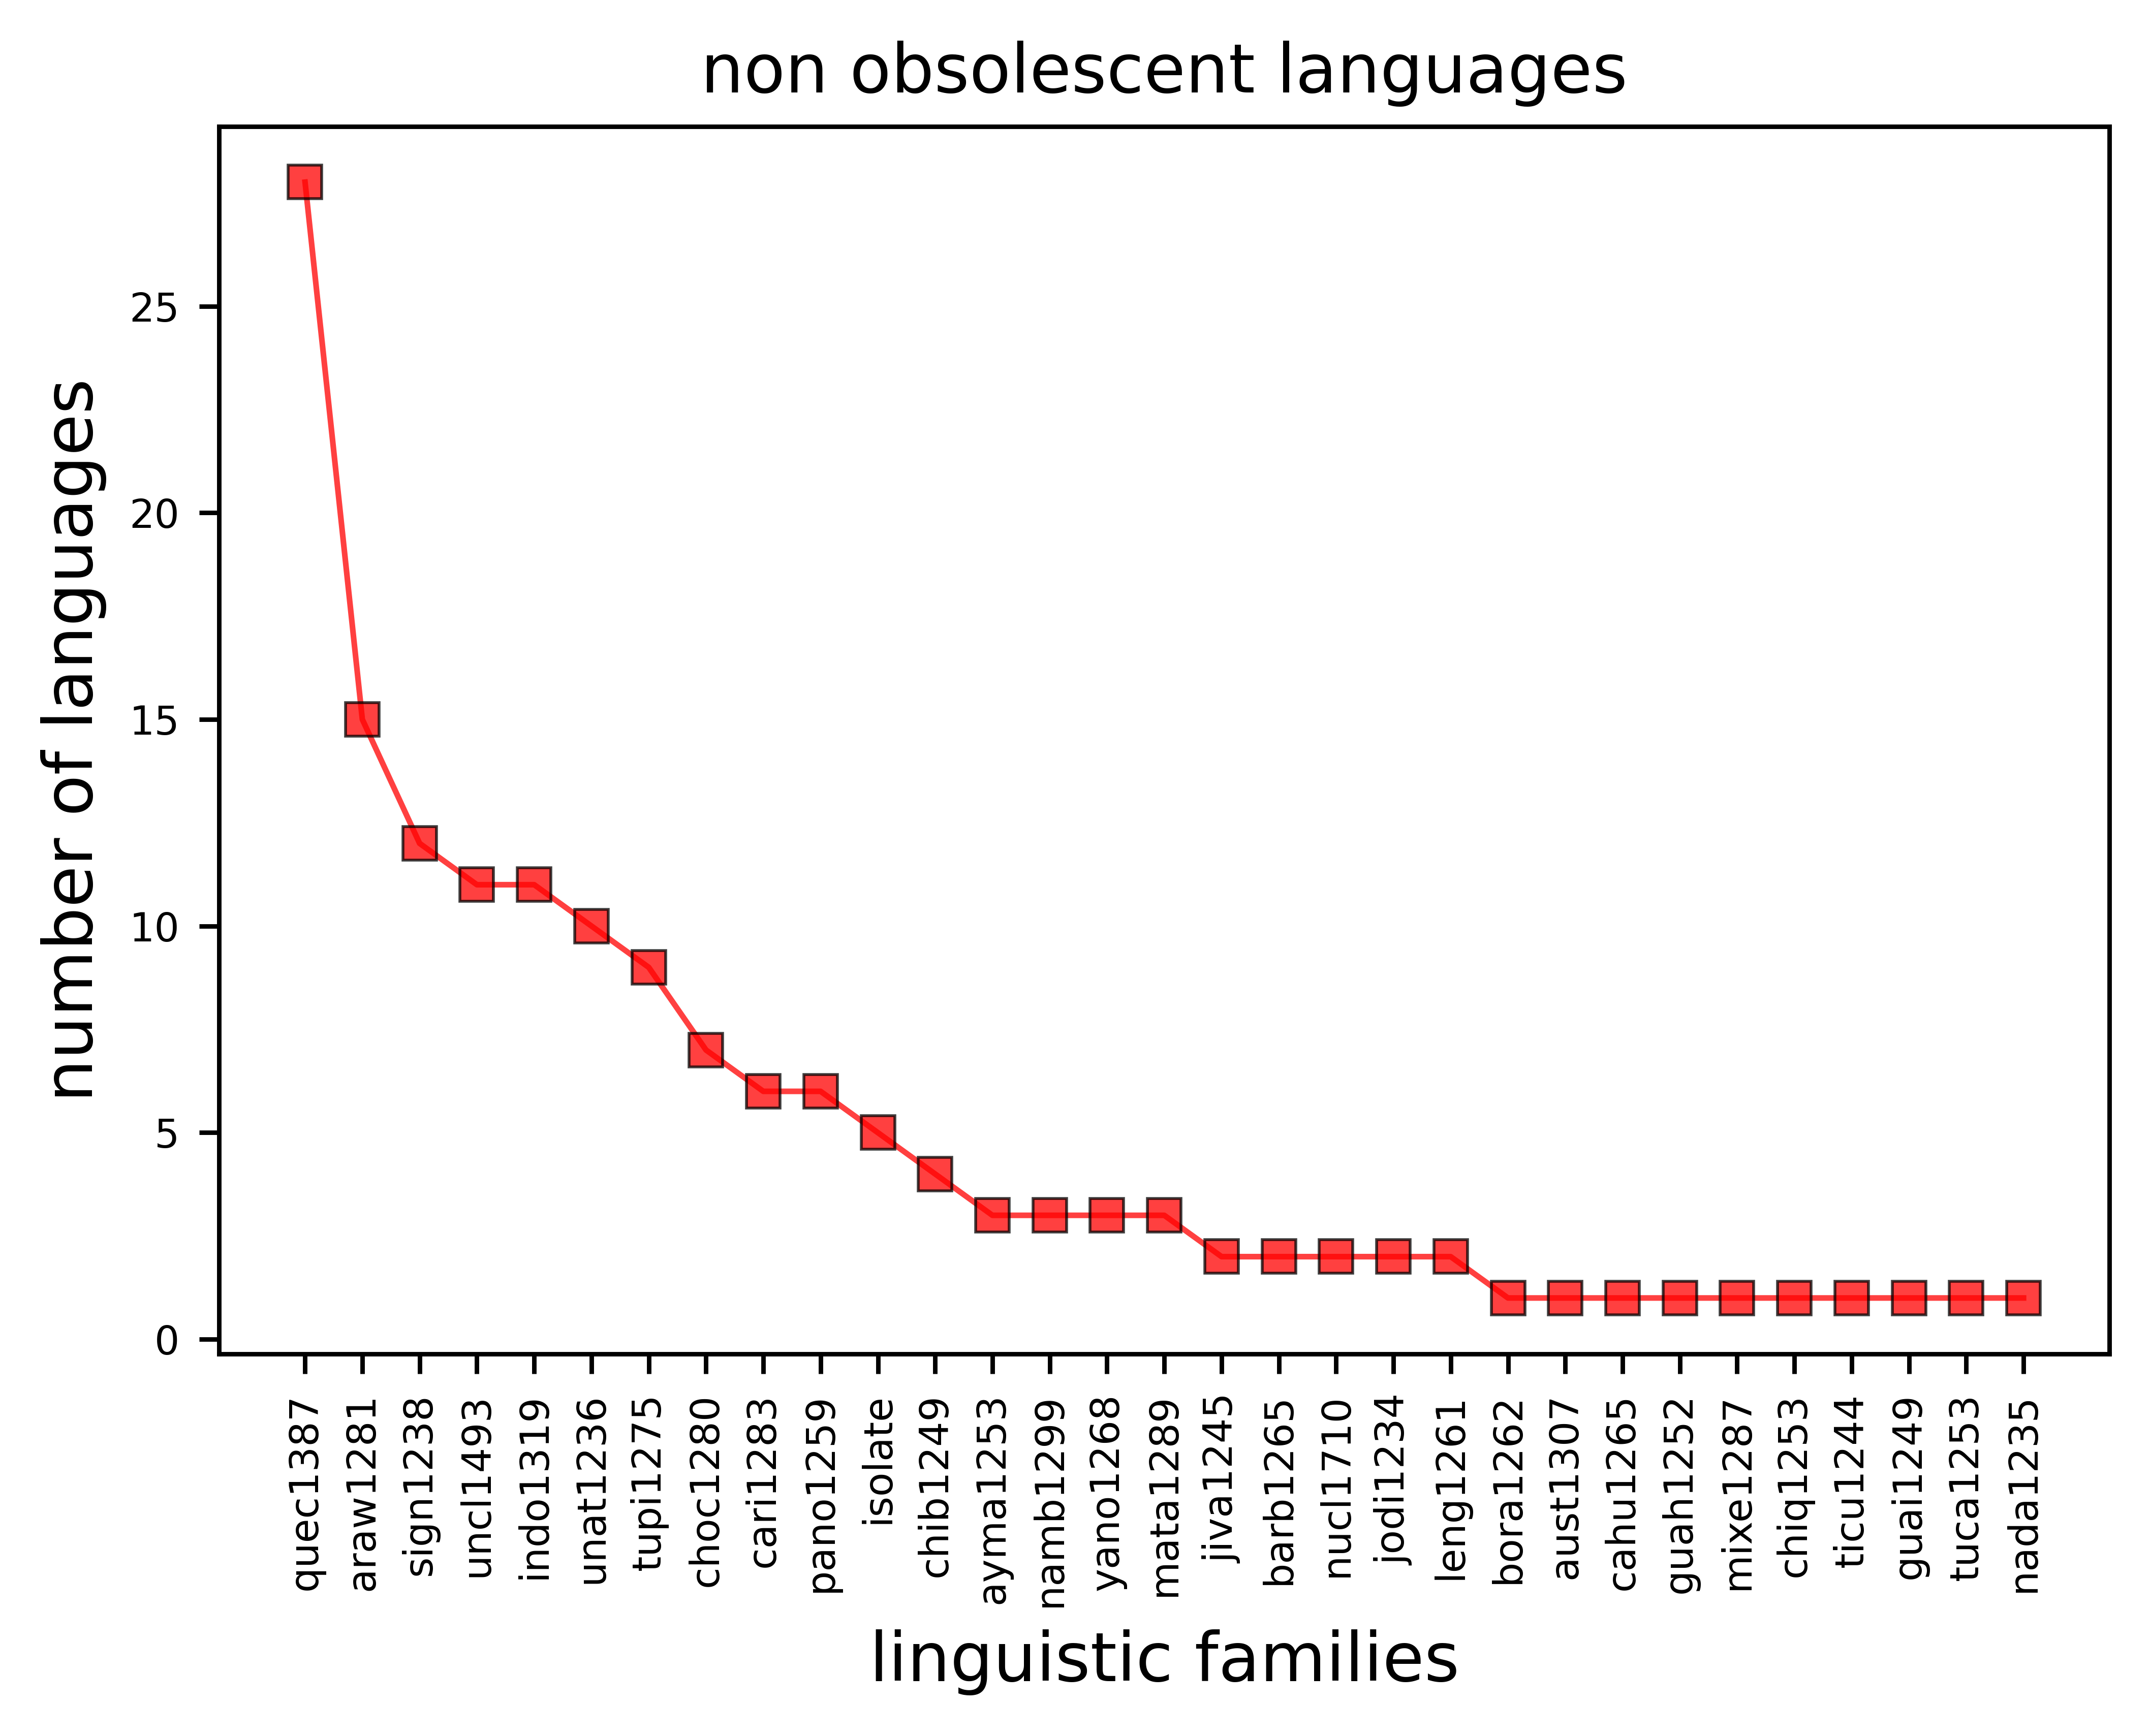

In [309]:
fig, ax = plt.subplots(dpi=800)
plt.title('non obsolescent languages',fontsize=12)
ax.plot(NON.keys(),NON.values(),marker='s',color='r',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full',clip_on=True)

#ax.plot(X,Y,marker='x',color='k',markersize=6,markeredgewidth=1,markeredgecolor='k',alpha=0.85,linewidth=0,fillstyle='full',clip_on=True,label='Others')

#plt.grid(False)
#plt.legend(loc='best',fontsize=7)
plt.xticks(rotation=90)
plt.ylabel(r'number of languages',fontsize=12)
plt.xlabel(r'linguistic families',fontsize=12)
plt.rcParams.update({'font.size': 7})
plt.savefig('map-obsolescence/non-fam.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [310]:
len({language:status[language] for language in status.keys() if status[language]=='obsolescent'})

89

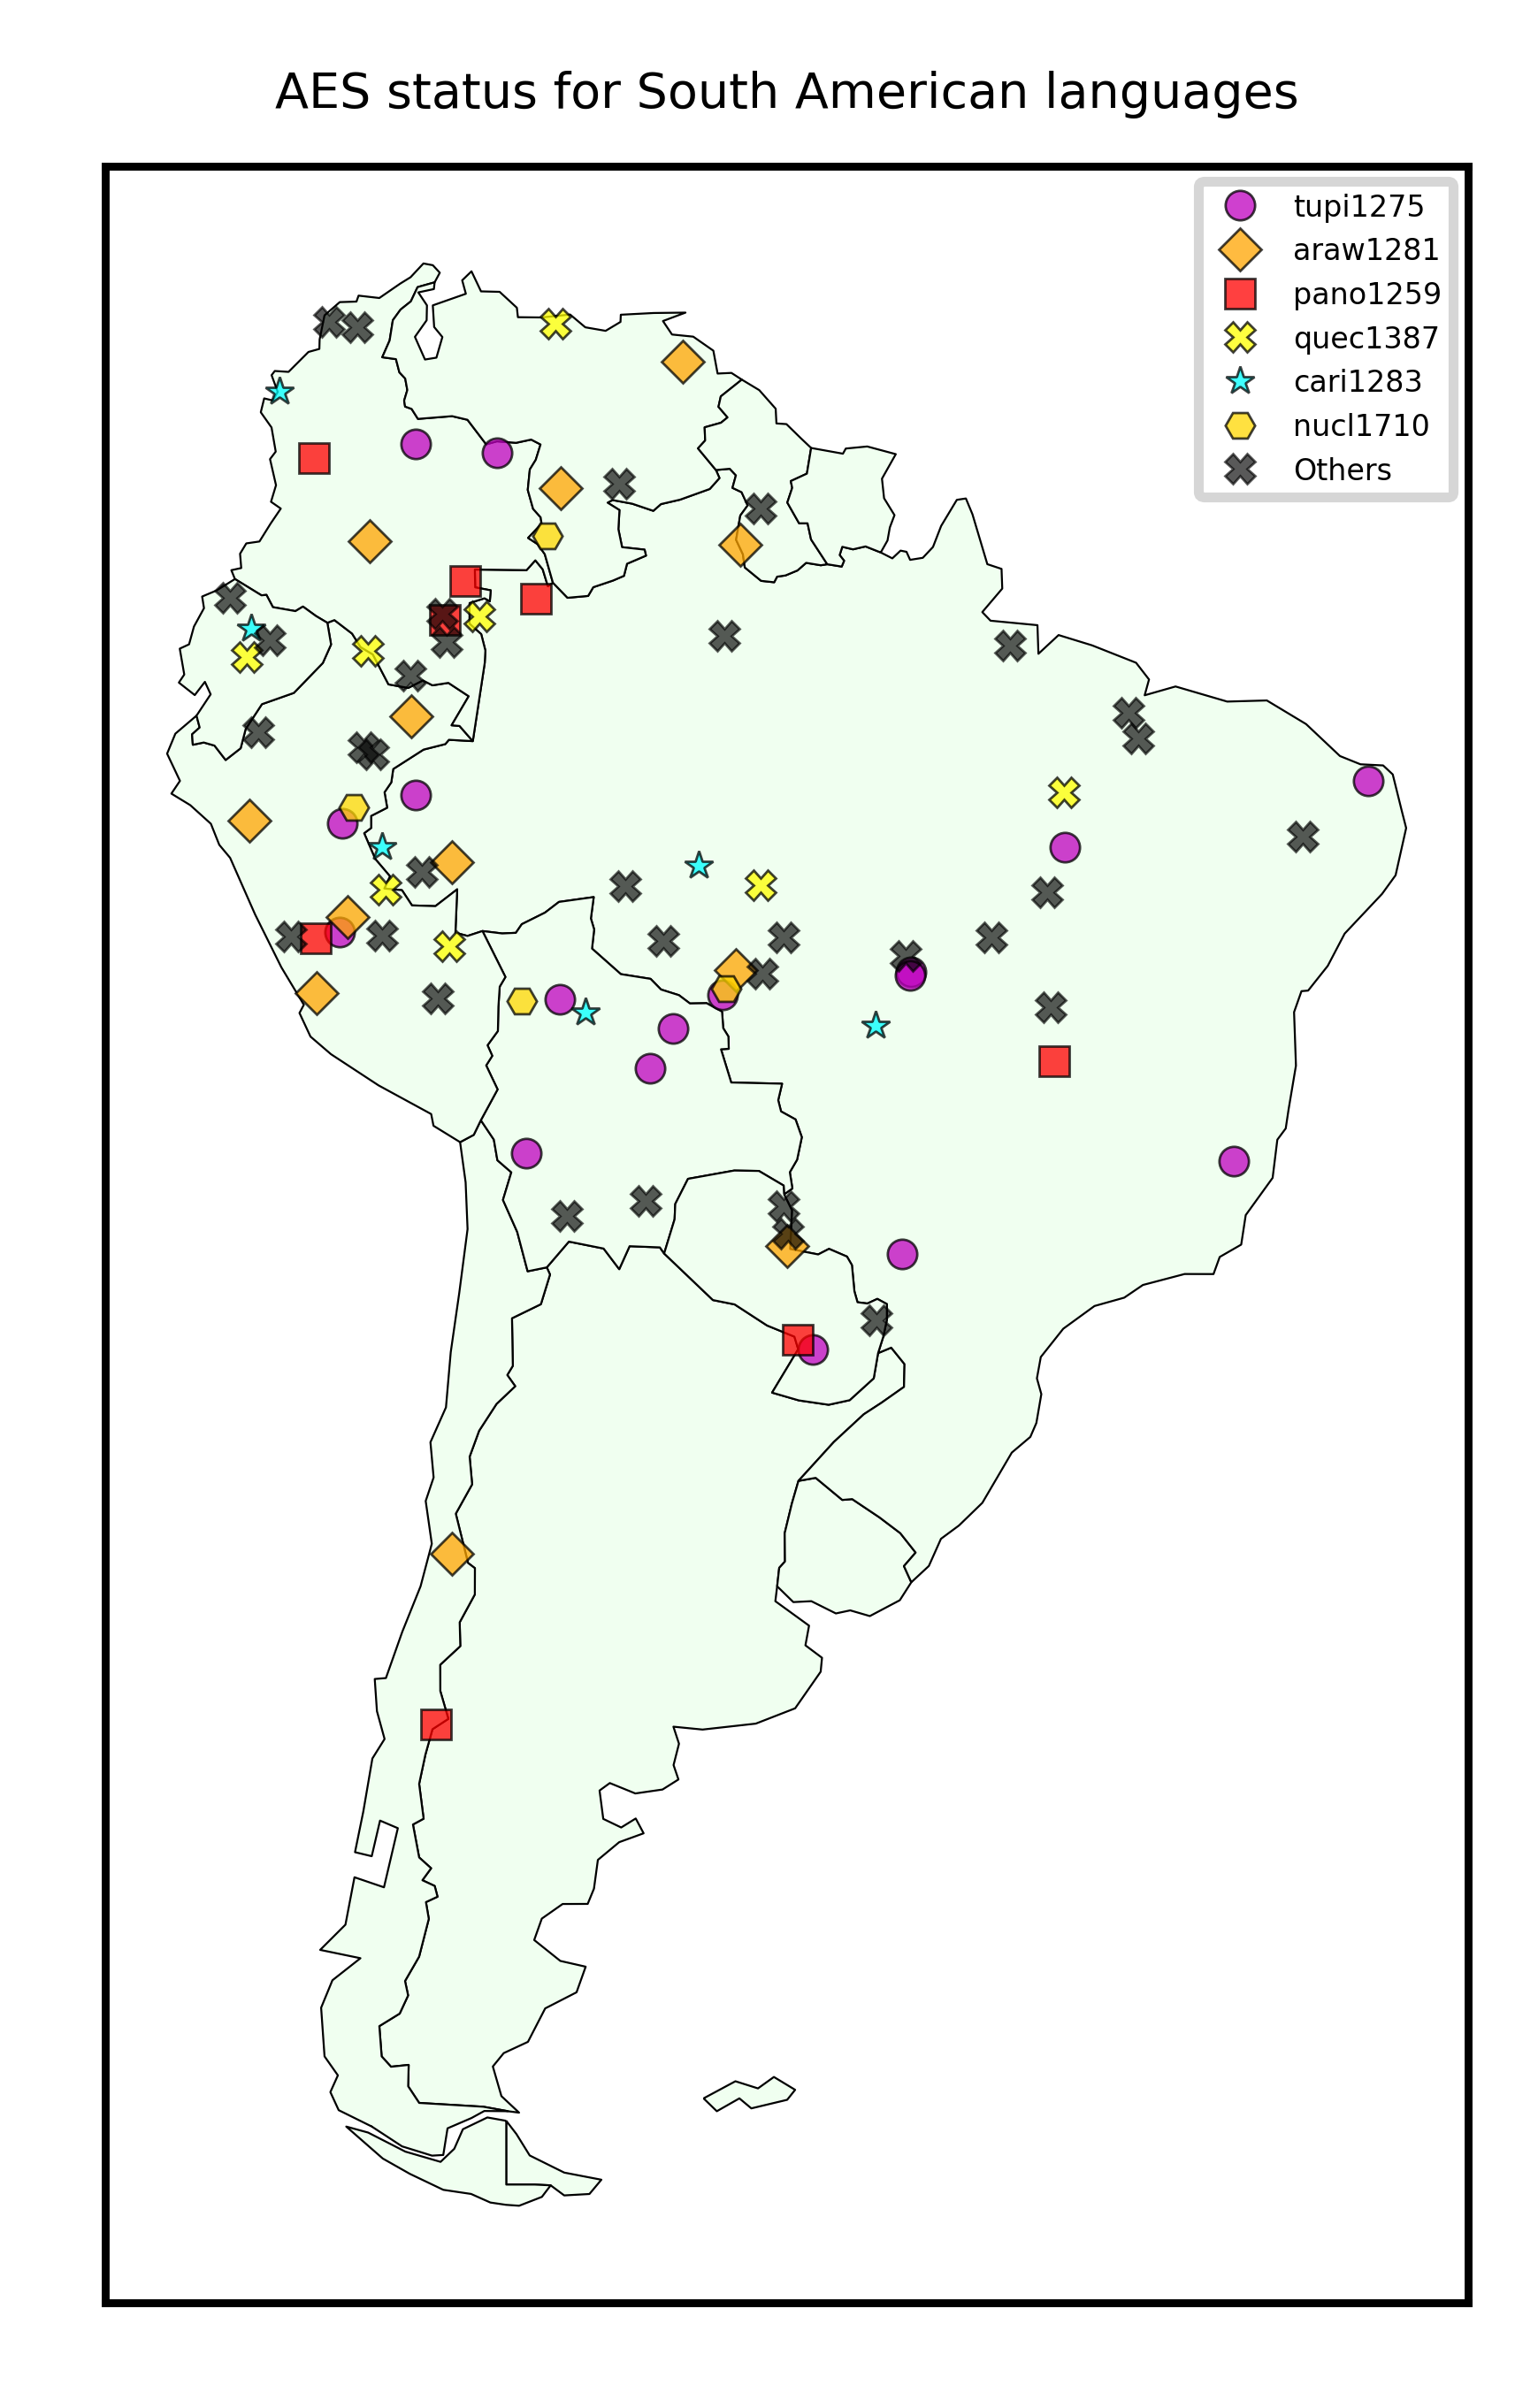

In [311]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

ax.set_aspect('equal')
plt.title('AES status for South American languages',fontsize=5)
world.plot(ax=ax, color='honeydew', edgecolor='k',linewidth=0.2)
    
#for group in labels_group.keys():
    
#    ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in labels.keys() and labels[language]==group]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in labels.keys() and labels[language]==group]],marker=colors_group[group][1],color=colors_group[group][0],markersize=4,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='none',clip_on=True,label=group)

#for language in location.keys():
#    if language in languages_conflict:
#        ax.annotate(max(probs[language].round(2)), weight='demi', color='k', xy=(location[language][1],location[language][0]), fontsize=2.5, alpha=0.85)
F = ['tupi1275','araw1281','pano1259','quec1387','cari1283','nucl1710']
colors = {x:y for x,y in zip(F,[['m','o'],['orange','D'],['r','s'],['yellow','X'],['cyan','*'],['gold','H']])}
for fam in F:

    ax.plot([x[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in status.keys() and status[language]=='obsolescent' and family_id[language]==fam]],[y[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in status.keys() and status[language]=='obsolescent' and family_id[language]==fam]],marker=colors[fam][1],color=colors[fam][0],markersize=3,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='full',clip_on=True,label=fam)

ax.plot([x[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in status.keys() and status[language]=='obsolescent' and family_id[language] not in F]],[y[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in status.keys() and status[language]=='obsolescent' and family_id[language] not in F]],marker='X',color='k',markersize=3,markeredgewidth=0.25,markeredgecolor='k',alpha=0.65,linewidth=0,fillstyle='full',clip_on=True,label='Others')

#ax.plot([x[i] for i in [list(LL_families.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],'*',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='North America')
#ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if (language not in id_family.keys()) or (language in id_family.keys() and id_family[language] not in families)]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if (language not in id_family.keys()) or (language in id_family.keys() and id_family[language] not in families)]],marker='x',color='k',markersize=3,markeredgewidth=1,markeredgecolor='k',alpha=0.65,linewidth=0,fillstyle='full',clip_on=True,label='Others')

plt.legend(loc='best',fontsize=3)
ax.set_yticks([])
ax.set_xticks([])
plt.savefig('map-obsolescence/mapa_obs_fam.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### países!

In [312]:
country = {key:country[key] for key in country.keys() if key in status.keys()}

In [313]:
len(country)

427

In [314]:
country

{'acha1250': 'CO',
 'ache1246': 'PY',
 'achu1248': 'EC PE',
 'agua1253': 'PE',
 'aika1237': 'BR',
 'ajyi1238': 'PE',
 'akaw1239': 'BR GY VE',
 'akun1241': 'BR',
 'alap1235': 'BR',
 'amah1246': 'BR PE',
 'amar1274': 'PE',
 'ambo1252': 'PE',
 'amun1246': 'BR',
 'ando1256': 'CO',
 'anga1316': 'PY',
 'ango1257': 'CO',
 'apal1257': 'BR',
 'apin1244': 'BR',
 'apur1254': 'BR',
 'arab1268': 'PE',
 'arao1248': 'BO',
 'araw1273': 'BR',
 'araw1276': 'GF GY SR VE',
 'areq1237': 'PE',
 'arge1236': 'AR',
 'arhu1242': 'CO',
 'arik1265': 'BR',
 'arua1261': 'BR',
 'asha1243': 'PE',
 'ashe1272': 'PE',
 'ashe1273': 'PE',
 'ator1244': 'BR GY',
 'avac1239': 'BR',
 'awac1239': 'CO EC',
 'awet1244': 'BR',
 'ayac1239': 'PE',
 'ayor1240': 'BO PY',
 'baen1237': 'BR',
 'baka1277': 'BR',
 'bani1255': 'BR CO VE',
 'bara1380': 'CO',
 'bare1276': 'VE',
 'bari1297': 'CO VE',
 'barr1251': 'CO',
 'baur1253': 'BO',
 'boli1236': 'BO',
 'bora1263': 'BR CO PE',
 'bord1248': 'CO PA',
 'boro1282': 'BR',
 'braz1236': 'BR',
 '

In [315]:
country['qawa1238']

'CL'

In [316]:
country = {key:country[key].split(' ') for key in country.keys()}

In [317]:
countries = set([item for sublist in list(country.values()) for item in sublist])

In [318]:
countries

{'AR',
 'AW',
 'BO',
 'BR',
 'CL',
 'CO',
 'EC',
 'GF',
 'GY',
 'NL',
 'PA',
 'PE',
 'PY',
 'SR',
 'TT',
 'UY',
 'VE'}

In [319]:
status_country = {key:[] for key in countries}

In [320]:
for key in status_country:
    for language in status.keys():
        if language in country.keys():
            if key in country[language]:
                status_country[key]+=[status[language]]

In [321]:
status_country

{'EC': ['shifting',
  'non obsolescent',
  'non obsolescent',
  'non obsolescent',
  'shifting',
  'non obsolescent',
  'shifting',
  'shifting',
  'non obsolescent',
  'non obsolescent',
  'non obsolescent',
  'non obsolescent',
  'non obsolescent',
  'non obsolescent',
  'non obsolescent',
  'shifting',
  'shifting',
  'non obsolescent',
  'shifting',
  'non obsolescent',
  'shifting',
  'obsolescent'],
 'AW': ['non obsolescent', 'non obsolescent'],
 'BO': ['shifting',
  'shifting',
  'obsolescent',
  'shifting',
  'obsolescent',
  'shifting',
  'obsolescent',
  'non obsolescent',
  'non obsolescent',
  'shifting',
  'non obsolescent',
  'shifting',
  'shifting',
  'non obsolescent',
  'shifting',
  'shifting',
  'shifting',
  'obsolescent',
  'obsolescent',
  'shifting',
  'obsolescent',
  'shifting',
  'non obsolescent',
  'shifting',
  'shifting',
  'non obsolescent',
  'obsolescent',
  'obsolescent',
  'obsolescent',
  'obsolescent',
  'non obsolescent',
  'obsolescent',
  'non o

In [322]:
for key in status_country.keys():
    D=dict(Counter(status_country[key]))
    status_country[key]=dict(sorted(D.items(), key=lambda item: item[1], reverse=True))

In [323]:
status_country

{'EC': {'non obsolescent': 13, 'shifting': 8, 'obsolescent': 1},
 'AW': {'non obsolescent': 2},
 'BO': {'shifting': 20, 'non obsolescent': 13, 'obsolescent': 11},
 'GF': {'shifting': 5, 'non obsolescent': 4, 'obsolescent': 1},
 'PA': {'non obsolescent': 5, 'shifting': 1},
 'CL': {'non obsolescent': 4, 'obsolescent': 3, 'shifting': 1},
 'VE': {'shifting': 20, 'non obsolescent': 14, 'obsolescent': 8},
 'NL': {'non obsolescent': 2},
 'CO': {'shifting': 50, 'non obsolescent': 28, 'obsolescent': 11},
 'UY': {'obsolescent': 1, 'non obsolescent': 1, 'shifting': 1},
 'TT': {'non obsolescent': 1},
 'PY': {'shifting': 11, 'non obsolescent': 9, 'obsolescent': 2},
 'BR': {'shifting': 102, 'non obsolescent': 55, 'obsolescent': 37},
 'GY': {'non obsolescent': 8, 'obsolescent': 3, 'shifting': 3},
 'SR': {'non obsolescent': 9, 'shifting': 3, 'obsolescent': 1},
 'PE': {'non obsolescent': 42, 'shifting': 26, 'obsolescent': 25},
 'AR': {'non obsolescent': 12, 'shifting': 8, 'obsolescent': 2}}

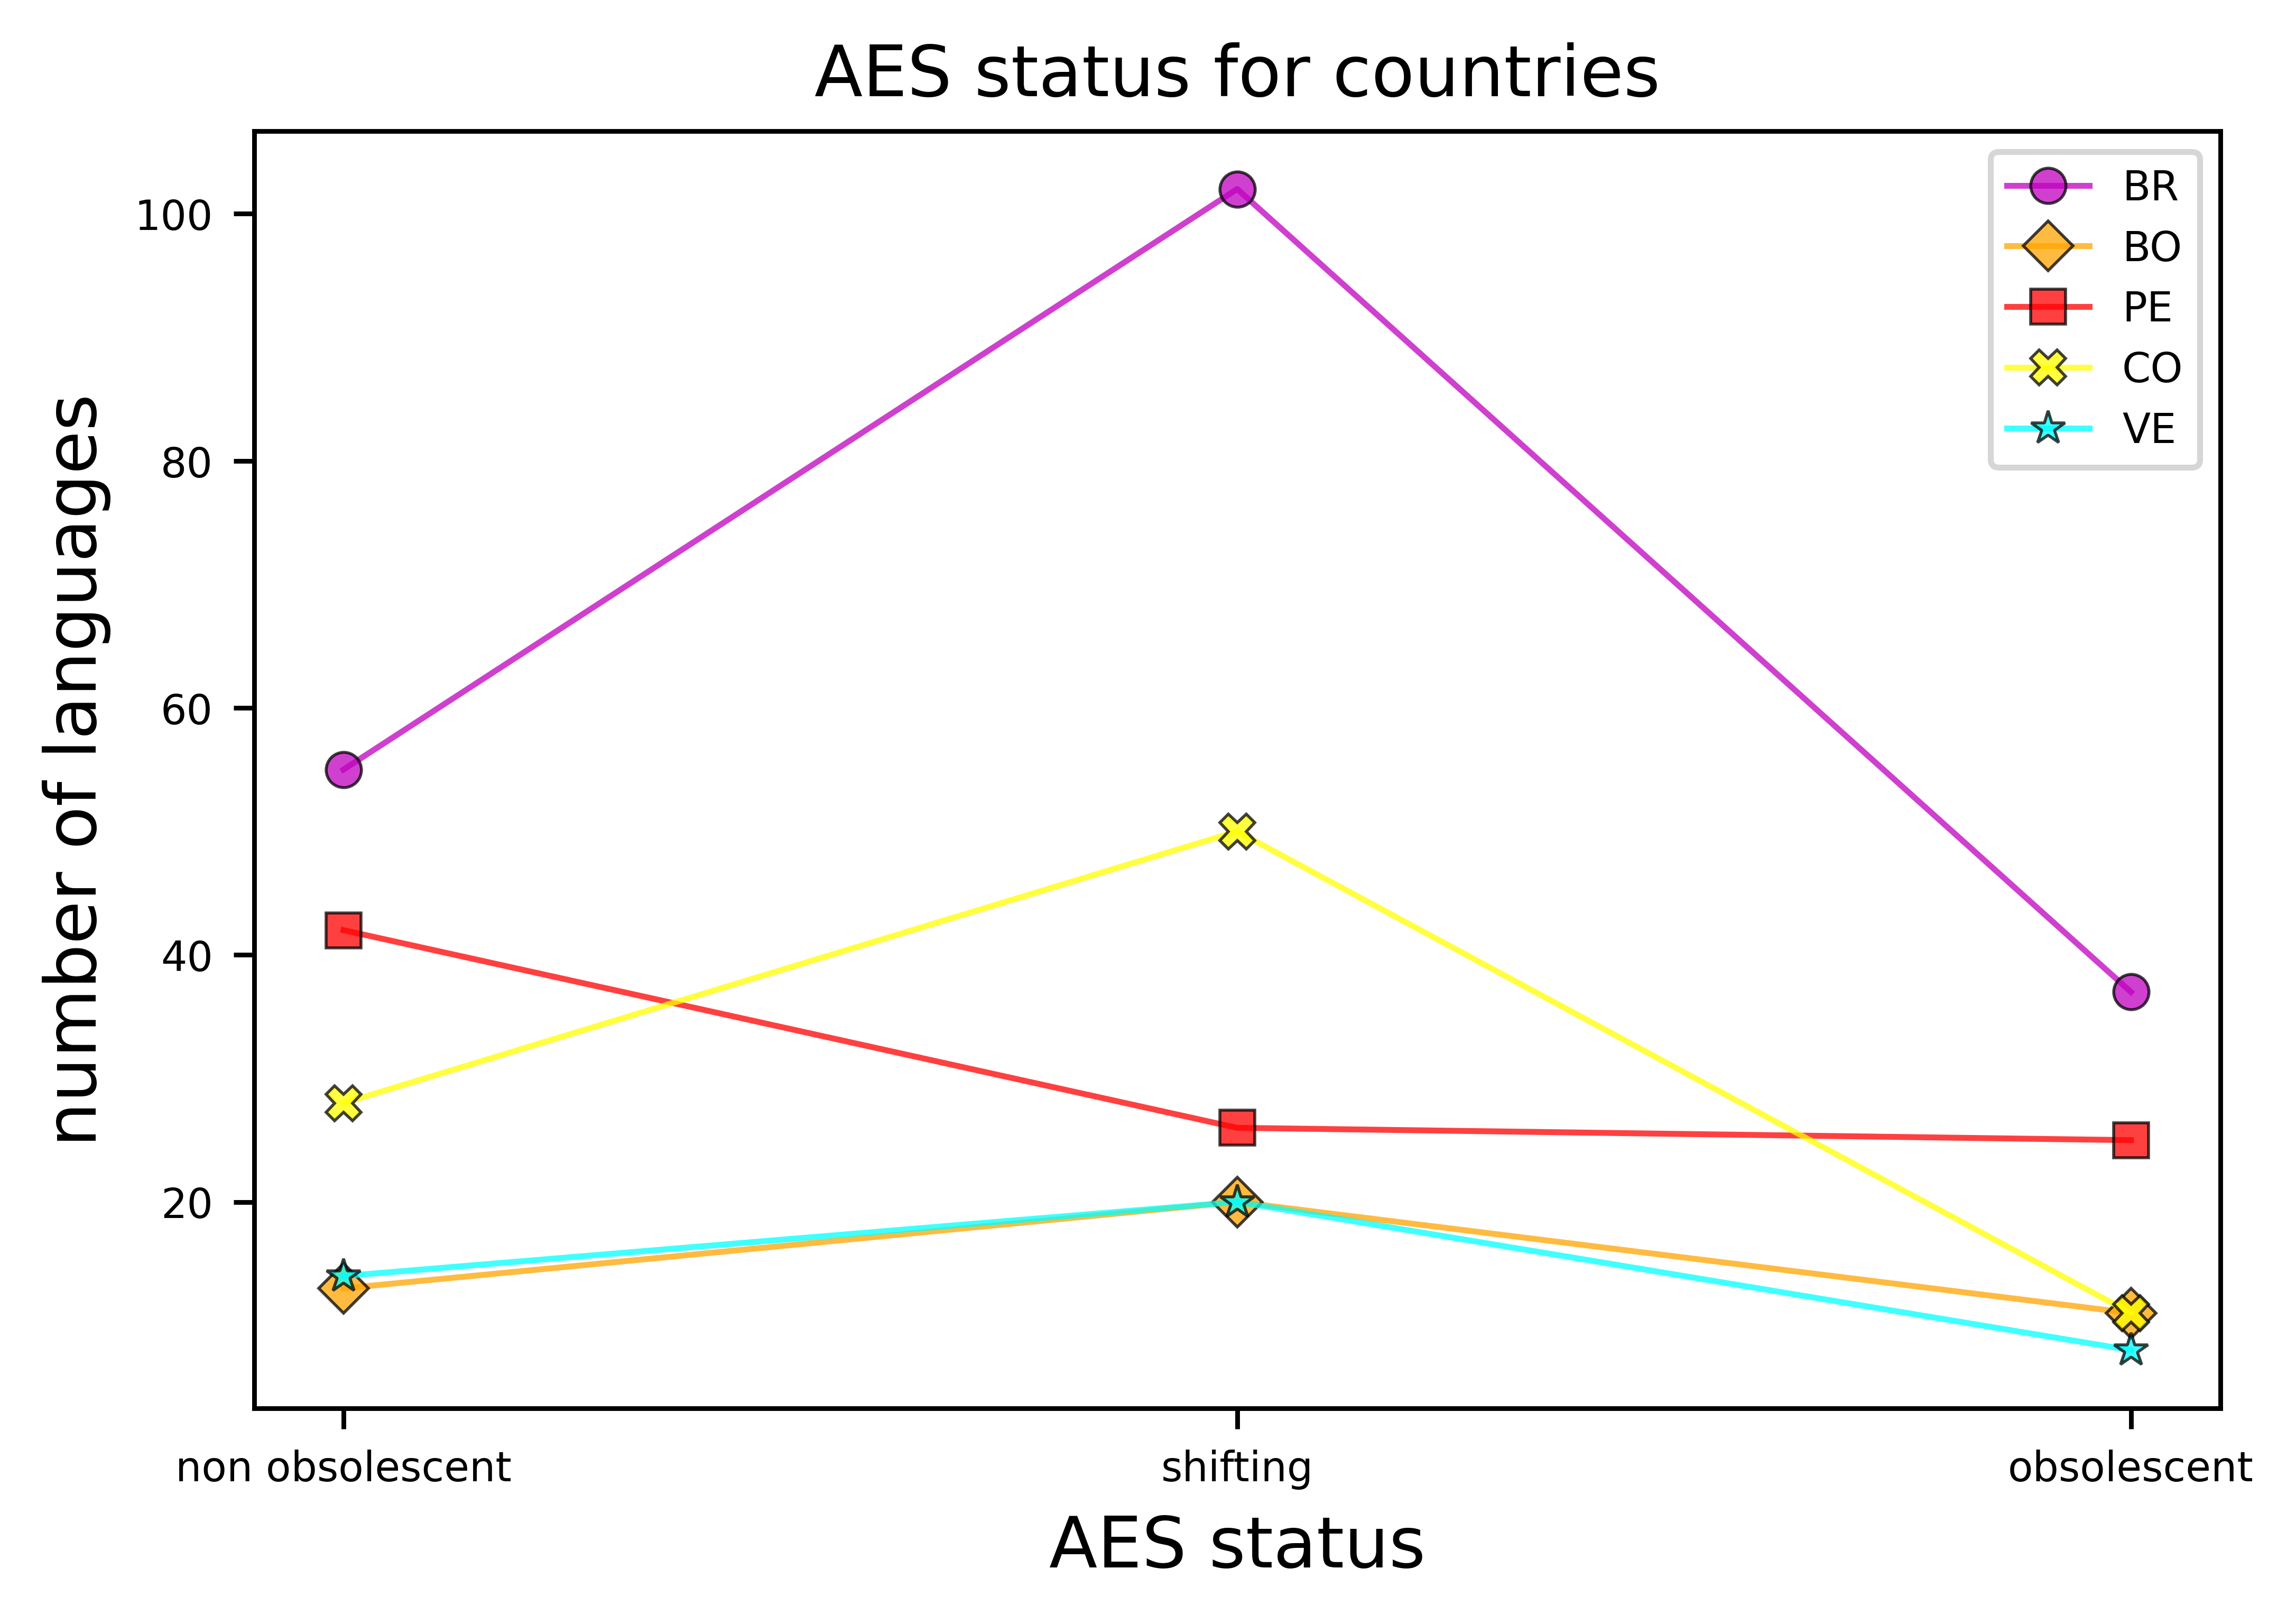

In [324]:
fig, ax = plt.subplots(dpi=800)
plt.title('AES status for countries',fontsize=12)

colors = {x:y for x,y in zip(['BR','BO','PE','CO','VE'],[['m','o'],['orange','D'],['r','s'],['yellow','X'],['cyan','*'],['gold','H']])}
for c in ['BR','BO','PE','CO','VE']:
    X=['non obsolescent','shifting','obsolescent']
    Y=[status_country[c][key] for key in X]
    
    ax.plot(X,Y,marker=colors[c][1],color=colors[c][0],markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full',clip_on=True,label=c)

#ax.plot(X,Y,marker='x',color='k',markersize=6,markeredgewidth=1,markeredgecolor='k',alpha=0.85,linewidth=0,fillstyle='full',clip_on=True,label='Others')

#plt.grid(False)
plt.legend(loc='best',fontsize=7)
#plt.xticks(rotation=90)
plt.ylabel(r'number of languages',fontsize=12)
plt.xlabel(r'AES status',fontsize=12)
plt.rcParams.update({'font.size': 7})
plt.savefig('map-obsolescence/countries.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [325]:
percentage_obs = {}

for C in status_country.keys():
    if 'obsolescent' in status_country[C].keys():
        percentage_obs[C]=status_country[C]['obsolescent']/sum(list(status_country[C].values()))
    else:
        percentage_obs[C]=0

In [326]:
percentage_obs

{'EC': 0.045454545454545456,
 'AW': 0,
 'BO': 0.25,
 'GF': 0.1,
 'PA': 0,
 'CL': 0.375,
 'VE': 0.19047619047619047,
 'NL': 0,
 'CO': 0.12359550561797752,
 'UY': 0.3333333333333333,
 'TT': 0,
 'PY': 0.09090909090909091,
 'BR': 0.19072164948453607,
 'GY': 0.21428571428571427,
 'SR': 0.07692307692307693,
 'PE': 0.26881720430107525,
 'AR': 0.09090909090909091}

### language isolates!

In [327]:
isolates = ['arut1244','sape1238','puin1248','pume1238','taru1236','wara1303','yuwa1244','paez1247','tini1245',
            'cams1241','leco1242','ando1256','cofa1242','cand1248','waor1240','taus1253','urar1246','cayu1262',
            'iton1250','movi1243','kano1245','kwaz1243','aika1237','mose1249','yura1255','chiq1248','guat1253',
            'iran1263','pira1253','trum1247','fuln1247','vile1241','yama1264','mapu1245']

In [328]:
print(len(isolates))

34


In [329]:
non_iso = [L for L in non if L in isolates]
shi_iso = [L for L in shi if L in isolates]
obs_iso = [L for L in obs if L in isolates]

In [330]:
print(len(non_iso),len(shi_iso),len(obs_iso))

5 14 11
